<a href="https://colab.research.google.com/github/danielandrader/ProjetoFinalDS/blob/main/enem2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Daniel Roberto

Linkedin: https://www.linkedin.com/in/daniel-andrade-roberto

Git: https://github.com/danielandrader

Kagle: https://www.kaggle.com/danielandrader

# Introdução

Enem

Os microdados do Enem são o menor nível de desagregação de dados recolhidos por meio do exame. Eles atendem a demanda por informações específicas ao disponibilizar as provas, os gabaritos, as informações sobre os itens, as notas e o questionário respondido pelos inscritos no Enem.

https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

## Questões

IDHM da região influencia na nota dos alunos?

Nota de LC influencia na nota da redação?

Nota de MT influencia na nota da redação?

De que forma a pandemia afetou as notas? Quem teve acesso a internet teve um desempenho melhor?

Renda afeta o desempenho dos candidatos?

Grau de instrução dos pais tem influência na nota do candidato?




# Importação da base

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls /content/drive/MyDrive/dataset

churn.csv  idh2017_tratado.csv	MICRODADOS_ENEM_2021.csv  risco_credito.csv


In [4]:
df = pd.read_csv("/content/drive/MyDrive/dataset/MICRODADOS_ENEM_2021.csv", sep=';', encoding="ISO-8859-1")

In [5]:
# configurar formato exibição tipo float
pd.options.display.float_format = '{:.5f}'.format

# reverter configuração
# pd.reset_option('^display.', silent=True)

# Verificação da base

In [6]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [7]:
df.tail()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2685048,210052034039,2021,4,M,1,1,1,2,0,2,...,A,A,A,B,A,B,E,B,C,B
2685049,210051134913,2021,4,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
2685050,210051964252,2021,5,M,1,3,1,1,2,1,...,B,B,B,B,B,B,B,B,B,B
2685051,210053743073,2021,4,F,1,0,1,1,2,1,...,B,A,A,B,A,A,C,A,B,B
2685052,210053609120,2021,13,F,1,1,1,2,0,2,...,B,A,A,B,A,A,C,A,A,B


In [8]:
df.shape

(2685053, 76)

In [9]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [10]:
df.dtypes

NU_INSCRICAO        int64
NU_ANO              int64
TP_FAIXA_ETARIA     int64
TP_SEXO            object
TP_ESTADO_CIVIL     int64
                    ...  
Q021               object
Q022               object
Q023               object
Q024               object
Q025               object
Length: 76, dtype: object

In [11]:
df.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,2685053.00000,2685053.00000,2685053.00000,2685053.00000,2685053.00000,2685053.00000,2685053.00000,2685053.00000,2685053.00000,981318.00000,...,1940703.00000,2685053.00000,2041773.00000,2041773.00000,2041773.00000,2041773.00000,2041773.00000,2041773.00000,2041773.00000,2685052.00000
mean,210052741216.09607,2021.00000,4.77514,1.03508,2.02561,1.02743,1.66550,2.09047,1.44789,1.00587,...,537.93493,0.45720,1.12841,120.43387,140.19132,116.87041,129.98206,116.32600,623.80365,3.77347
std,996952.49973,0.00000,3.58474,0.37537,1.02526,0.20717,0.71827,3.82022,0.61661,0.07642,...,111.39132,0.49817,0.75321,33.69056,45.51197,36.26760,38.92326,59.58048,190.31581,1.34778
min,210051014329.00000,2021.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,1.00000,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
25%,210051877638.00000,2021.00000,2.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,...,446.40000,0.00000,1.00000,100.00000,120.00000,100.00000,120.00000,80.00000,520.00000,3.00000
50%,210052740505.00000,2021.00000,3.00000,1.00000,2.00000,1.00000,2.00000,0.00000,1.00000,1.00000,...,518.10000,0.00000,1.00000,120.00000,120.00000,120.00000,120.00000,120.00000,620.00000,4.00000
75%,210053602607.00000,2021.00000,6.00000,1.00000,3.00000,1.00000,2.00000,2.00000,2.00000,1.00000,...,617.80000,1.00000,1.00000,140.00000,180.00000,140.00000,160.00000,160.00000,760.00000,4.00000
max,210054466282.00000,2021.00000,20.00000,4.00000,6.00000,4.00000,4.00000,15.00000,3.00000,2.00000,...,953.10000,1.00000,9.00000,200.00000,200.00000,200.00000,200.00000,200.00000,1000.00000,20.00000


In [12]:
na = df.isna().sum()
na.nlargest(20)

CO_MUNICIPIO_ESC          1964743
NO_MUNICIPIO_ESC          1964743
CO_UF_ESC                 1964743
SG_UF_ESC                 1964743
TP_DEPENDENCIA_ADM_ESC    1964743
TP_LOCALIZACAO_ESC        1964743
TP_SIT_FUNC_ESC           1964743
TP_ENSINO                 1703735
CO_PROVA_CN                744350
CO_PROVA_MT                744350
NU_NOTA_CN                 744350
NU_NOTA_MT                 744350
TX_RESPOSTAS_CN            744350
TX_RESPOSTAS_MT            744350
TX_GABARITO_CN             744350
TX_GABARITO_MT             744350
CO_PROVA_CH                643280
CO_PROVA_LC                643280
NU_NOTA_CH                 643280
NU_NOTA_LC                 643280
dtype: int64

# Análise Exploratória de Dados 

## Analisar local aplicação prova x local escola

In [13]:
# analisar o porquê de tantos NaN

df[df["SG_UF_ESC"].isna()][["NU_INSCRICAO","NO_MUNICIPIO_PROVA", "CO_UF_ESC", "SG_UF_ESC"]]

,NU_INSCRICAO,NO_MUNICIPIO_PROVA,CO_UF_ESC,SG_UF_ESC
0,210053865474,Nova Lima,NaN,NaN
1,210052384164,Maceió,NaN,NaN
2,210052589243,Ferraz de Vasconcelos,NaN,NaN
5,210052391248,Cascavel,NaN,NaN
6,210052615524,Tramandaí,NaN,NaN
...,...,...,...,...
2685045,210053940424,Barueri,NaN,NaN
2685047,210052256140,Itaguaí,NaN,NaN
2685049,210051134913,Coruripe,NaN,NaN
2685050,210051964252,Salvador,NaN,NaN


## Analisar notas

In [14]:
# NU_NOTA_CN - Nota da prova de Ciências da Natureza
# NU_NOTA_CH - Nota da prova de Ciências Humanas
# NU_NOTA_LC - Nota da prova de Linguagens e Códigos
# NU_NOTA_MT - Nota da prova de Matemática
# NU_NOTA_REDACAO - Nota da prova de redação

notas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO"]

In [15]:
df[notas].sample(10)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1877862,544.00000,636.70000,604.20000,446.30000,720.00000
724707,382.90000,407.60000,476.30000,435.60000,460.00000
1731799,505.50000,577.50000,560.60000,447.70000,620.00000
1014438,510.50000,546.70000,548.00000,531.00000,640.00000
585774,447.40000,437.50000,335.60000,476.00000,460.00000
663796,361.90000,463.90000,423.00000,420.50000,460.00000
1165451,404.90000,465.40000,489.30000,467.80000,540.00000
1477523,383.70000,386.60000,537.80000,428.40000,440.00000
768437,NaN,NaN,NaN,NaN,NaN
1166871,484.10000,564.20000,481.30000,490.10000,660.00000


In [16]:
# verificar NaN

df[notas].isna().sum()

NU_NOTA_CN         744350
NU_NOTA_CH         643280
NU_NOTA_LC         643280
NU_NOTA_MT         744350
NU_NOTA_REDACAO    643280
dtype: int64

In [17]:
# NaN candidatos que faltaram (0) e foram eliminados (2) na prova
# Redação foi aplicada no mesmo dia da prova LC

ausentes_cn = df[(df["TP_PRESENCA_CN"] == 0) | (df["TP_PRESENCA_CN"] == 2)]["TP_PRESENCA_CN"].count()
ausentes_ch = df[(df["TP_PRESENCA_CH"] == 0) | (df["TP_PRESENCA_CH"] == 2)]["TP_PRESENCA_CH"].count()
ausentes_lc = df[(df["TP_PRESENCA_LC"] == 0) | (df["TP_PRESENCA_LC"] == 2)]["TP_PRESENCA_LC"].count()
ausentes_mt = df[(df["TP_PRESENCA_MT"] == 0) | (df["TP_PRESENCA_MT"] == 2)]["TP_PRESENCA_MT"].count()

print("ausentes CN: {}".format(ausentes_cn))
print("ausentes CH: {}".format(ausentes_ch))
print("ausentes LC: {}".format(ausentes_lc))
print("ausentes MT: {}".format(ausentes_mt))

ausentes CN: 744350
ausentes CH: 643280
ausentes LC: 643280
ausentes MT: 744350


In [18]:
# metodo describe desconsidera NaN by default

df[notas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,1940703.00000,2041773.00000,2041773.00000,1940703.00000,2041773.00000
mean,492.99449,521.81591,503.81826,537.93493,623.80365
std,81.56349,95.82614,79.36821,111.39132,190.31581
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,431.30000,447.20000,448.70000,446.40000,520.00000
50%,482.50000,523.90000,507.10000,518.10000,620.00000
75%,547.80000,591.20000,560.30000,617.80000,760.00000
max,867.10000,846.90000,826.10000,953.10000,1000.00000


In [19]:
nota_presenca = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO","TP_PRESENCA_CN","TP_PRESENCA_CH","TP_PRESENCA_LC","TP_PRESENCA_MT","TP_STATUS_REDACAO"]

In [20]:
# Analisar as notas 0 na prova Ciências da Natureza

df[df["NU_NOTA_CN"] == 0][nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
5617,0.00000,646.70000,607.30000,0.00000,960.00000,1,1,1,1,1.00000
13362,0.00000,469.10000,513.60000,0.00000,560.00000,1,1,1,1,1.00000
18263,0.00000,359.70000,468.70000,0.00000,540.00000,1,1,1,1,1.00000
29704,0.00000,627.90000,572.40000,0.00000,580.00000,1,1,1,1,1.00000
43891,0.00000,NaN,NaN,0.00000,NaN,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
2650014,0.00000,NaN,NaN,549.20000,NaN,1,0,0,1,NaN
2661137,0.00000,461.00000,347.20000,0.00000,220.00000,1,1,1,1,1.00000
2662949,0.00000,418.20000,558.10000,603.00000,460.00000,1,1,1,1,1.00000
2666650,0.00000,557.70000,471.10000,586.20000,520.00000,1,1,1,1,1.00000


In [21]:
# candidatos que zeraram em todas as provas

df_zerou_todas_provas = df[((df["NU_NOTA_CN"] == 0) & (df["NU_NOTA_CH"] == 0) & (df["NU_NOTA_LC"] == 0) & (df["NU_NOTA_MT"] == 0) & (df["NU_NOTA_REDACAO"] == 0)) &
                           ( (df["TP_PRESENCA_CN"] == 1) & (df["TP_PRESENCA_CH"] == 1) & (df["TP_PRESENCA_LC"] == 1) & (df["TP_PRESENCA_MT"] == 1) )]
df_zerou_todas_provas[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
49511,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
229668,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
341795,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
1329969,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
1797226,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,8.00000
2166475,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
2180687,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
2400887,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
2500199,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000
2556885,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1,1,4.00000


In [22]:
# candidatos que zeraram em no minimo uma prova

df_zerou_alguma_prova = df[(df["NU_NOTA_CN"] == 0) | (df["NU_NOTA_CH"] == 0) | (df["NU_NOTA_LC"] == 0) | (df["NU_NOTA_MT"] == 0) | (df["NU_NOTA_REDACAO"] == 0)]

In [23]:
df_zerou_alguma_prova[nota_presenca].sample(20)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
2465349,NaN,393.00000,426.30000,NaN,0.00000,0,1,1,0,4.00000
2644217,NaN,416.90000,349.10000,NaN,0.00000,0,1,1,0,8.00000
2575812,526.40000,476.30000,524.10000,515.20000,0.00000,1,1,1,1,6.00000
348346,455.00000,387.40000,469.60000,397.40000,0.00000,1,1,1,1,2.00000
1091776,NaN,355.30000,496.10000,NaN,0.00000,0,1,1,0,4.00000
1224927,NaN,519.50000,534.50000,NaN,0.00000,0,1,1,0,4.00000
2425977,359.40000,411.80000,356.00000,377.90000,0.00000,1,1,1,1,3.00000
536601,NaN,397.50000,490.80000,NaN,0.00000,0,1,1,0,4.00000
2632589,NaN,407.80000,379.40000,NaN,0.00000,0,1,1,0,7.00000
1444625,511.90000,610.30000,606.80000,666.60000,0.00000,1,1,1,1,4.00000


In [24]:
# Não existem candidatos com NaN na nota da prova e com presença

df_nan_prova_presenca_1 = df[((df["NU_NOTA_CN"].isna()) | (df["NU_NOTA_CH"].isna()) | (df["NU_NOTA_LC"].isna()) | (df["NU_NOTA_MT"].isna()) | (df["NU_NOTA_REDACAO"].isna())) & 
                          ( (df["TP_PRESENCA_CN"] == 1) & (df["TP_PRESENCA_CH"] == 1) & (df["TP_PRESENCA_LC"] == 1) & (df["TP_PRESENCA_MT"] == 1) )]

df_nan_prova_presenca_1[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO


In [25]:
# Não existem candidatos com NaN em alguma campos de presença

df_nan_presenca = df[(df["TP_PRESENCA_CN"].isna()) | (df["TP_PRESENCA_CH"].isna()) | (df["TP_PRESENCA_LC"].isna()) | (df["TP_PRESENCA_MT"].isna())]
df_nan_presenca[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO


In [26]:
# Existem candidatos com NaN na nota da prova e não compareceu

df_nan_prova_presenca_0 = df[((df["NU_NOTA_CN"].isna()) | (df["NU_NOTA_CH"].isna()) | (df["NU_NOTA_LC"].isna()) | (df["NU_NOTA_MT"].isna()) | (df["NU_NOTA_REDACAO"].isna())) & 
                          ( (df["TP_PRESENCA_CN"] == 0) & (df["TP_PRESENCA_CH"] == 0) & (df["TP_PRESENCA_LC"] == 0) & (df["TP_PRESENCA_MT"] == 0) )]

df_nan_prova_presenca_0[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
2,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
5,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
13,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
14,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2685038,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
2685039,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
2685045,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
2685047,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN


In [27]:
# Existem candidatos com 0 em alguma na nota da prova e com presença

df_0_prova_presenca_1 = df[((df["NU_NOTA_CN"] == 0) | (df["NU_NOTA_CH"] == 0) | (df["NU_NOTA_LC"] == 0) | (df["NU_NOTA_MT"] == 0) | (df["NU_NOTA_REDACAO"] == 0)) & 
                          ( (df["TP_PRESENCA_CN"] == 1) & (df["TP_PRESENCA_CH"] == 1) & (df["TP_PRESENCA_LC"] == 1) & (df["TP_PRESENCA_MT"] == 1) )]

df_0_prova_presenca_1[nota_presenca].sample(20)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
708351,371.30000,365.50000,418.30000,389.10000,0.00000,1,1,1,1,6.00000
438041,403.70000,444.80000,416.70000,390.40000,0.00000,1,1,1,1,7.00000
2661308,432.20000,390.00000,347.60000,423.50000,0.00000,1,1,1,1,7.00000
2241757,479.10000,545.20000,483.10000,408.60000,0.00000,1,1,1,1,2.00000
515695,378.50000,491.00000,418.00000,486.00000,0.00000,1,1,1,1,6.00000
1480084,470.90000,570.50000,490.00000,469.30000,0.00000,1,1,1,1,6.00000
2619673,561.20000,444.60000,515.70000,737.20000,0.00000,1,1,1,1,4.00000
2285284,383.60000,386.80000,317.80000,412.30000,0.00000,1,1,1,1,6.00000
1433214,536.20000,555.30000,488.60000,505.30000,0.00000,1,1,1,1,4.00000
2041190,395.50000,451.40000,389.90000,465.80000,0.00000,1,1,1,1,6.00000


In [28]:
# Não existem candidatos com 0 em alguma na nota da prova e não compareceu

df_0_prova_presenca_0 = df[((df["NU_NOTA_CN"] == 0) | (df["NU_NOTA_CH"] == 0) | (df["NU_NOTA_LC"] == 0) | (df["NU_NOTA_MT"] == 0) | (df["NU_NOTA_REDACAO"] == 0)) & 
                          ( (df["TP_PRESENCA_CN"] == 0) & (df["TP_PRESENCA_CH"] == 0) & (df["TP_PRESENCA_LC"] == 0) & (df["TP_PRESENCA_MT"] == 0) )]

df_0_prova_presenca_0[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO


Constatações:

1) NaN na prova significa que candidato não compareceu;

2) O na prova significa que candidato de fato zerou a prova.

## Analise nota máxima redação

In [29]:
df_redacao_max = df[df["NU_NOTA_REDACAO"] == 1000]

In [30]:
df_redacao_max.isna().sum()

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               0
Q022               0
Q023               0
Q024               0
Q025               0
Length: 76, dtype: int64

In [31]:
df_redacao_max["TP_FAIXA_ETARIA"].value_counts(normalize=True)

5   0.33333
3   0.23810
4   0.14286
7   0.14286
2   0.04762
1   0.04762
6   0.04762
Name: TP_FAIXA_ETARIA, dtype: float64

In [32]:
def acerta_faixa_etaria(faixa):
  if faixa == 1:
    return "Menor de 17 anos"
  elif faixa == 2:
    return "17 anos"
  elif faixa == 3:
    return "18 anos"
  elif faixa == 4:
    return "19 anos"
  elif faixa == 5:
    return "20 anos"
  elif faixa == 6:
    return "21 anos"
  elif faixa == 7:
    return "22 anos"
  elif faixa == 8:
    return "23 anos"
  elif faixa == 9:
    return "24 anos"
  elif faixa == 10:
    return "25 anos"
  elif faixa == 11:
    return "Entre 26 e 30 anos"
  elif faixa == 12:
    return "Entre 31 e 35 anos"
  elif faixa == 13:
    return "Entre 36 e 40 anos"
  elif faixa == 14:
    return "Entre 41 e 45 anos"
  elif faixa == 15:
    return "Entre 46 e 50 anos"
  elif faixa == 16:
    return "Entre 51 e 55 anos"
  elif faixa == 17:
    return "Entre 56 e 60 anos"
  elif faixa == 18:
    return "Entre 61 e 65 anos"
  elif faixa == 19:
    return "Entre 66 e 70 anos"
  elif faixa == 20:
    return "Maior de 70 anos"


In [33]:
df_redacao_max["TP_FAIXA_ETARIA"].apply(acerta_faixa_etaria)

10068               18 anos
77754               17 anos
129842     Menor de 17 anos
175279              20 anos
248838              20 anos
301089              20 anos
334470              18 anos
564673              20 anos
604348              19 anos
725913              18 anos
899896              22 anos
905609              22 anos
998606              20 anos
1022568             20 anos
1193131             21 anos
1397534             18 anos
1402308             19 anos
1655212             20 anos
1810055             18 anos
2125045             19 anos
2224880             22 anos
Name: TP_FAIXA_ETARIA, dtype: object

In [34]:
df_redacao_max["DS_FAIXA_ETARIA"] = df_redacao_max["TP_FAIXA_ETARIA"].apply(acerta_faixa_etaria)
df_redacao_max["DS_FAIXA_ETARIA"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10068               18 anos
77754               17 anos
129842     Menor de 17 anos
175279              20 anos
248838              20 anos
301089              20 anos
334470              18 anos
564673              20 anos
604348              19 anos
725913              18 anos
899896              22 anos
905609              22 anos
998606              20 anos
1022568             20 anos
1193131             21 anos
1397534             18 anos
1402308             19 anos
1655212             20 anos
1810055             18 anos
2125045             19 anos
2224880             22 anos
Name: DS_FAIXA_ETARIA, dtype: object

In [35]:
df_redacao_qtd_faixa = df_redacao_max["DS_FAIXA_ETARIA"].value_counts().reset_index().rename(columns={"DS_FAIXA_ETARIA":"QT", "index":"DS_FAIXA_ETARIA"}).sort_values(by="QT", ascending=False)
df_redacao_qtd_faixa

,DS_FAIXA_ETARIA,QT
0,20 anos,7
1,18 anos,5
2,19 anos,3
3,22 anos,3
4,17 anos,1
5,Menor de 17 anos,1
6,21 anos,1


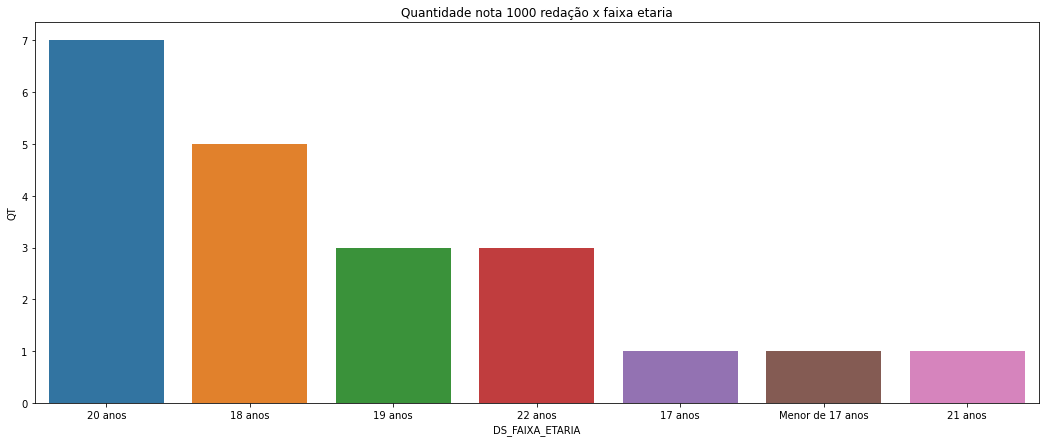

In [36]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x faixa etaria")
sns.barplot(x="DS_FAIXA_ETARIA", y="QT", data=df_redacao_qtd_faixa)
plt.show()

In [37]:
df_redacao_qtd_sexo = df_redacao_max["TP_SEXO"].value_counts().reset_index().rename(columns={"index":"TP_SEXO", "TP_SEXO": "QT"})
df_redacao_qtd_sexo

,TP_SEXO,QT
0,F,18
1,M,3


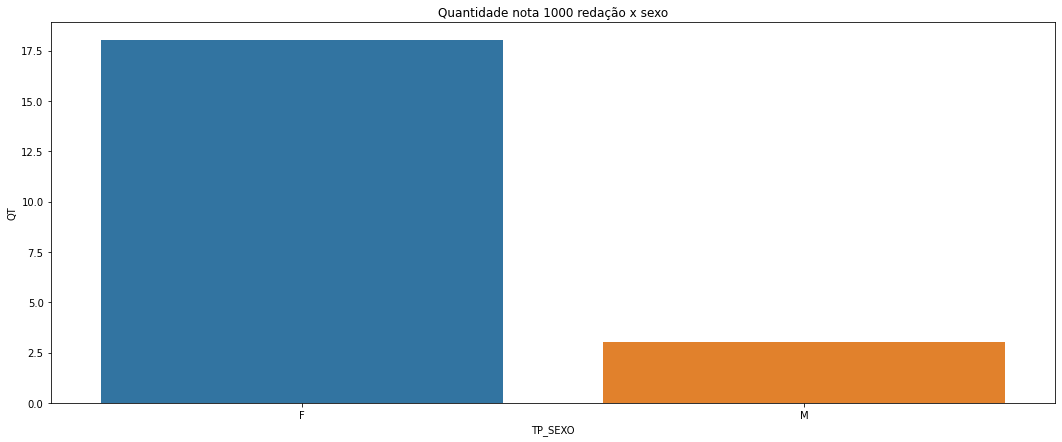

In [38]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x sexo")
sns.barplot(x="TP_SEXO", y="QT", data=df_redacao_qtd_sexo)
plt.show()

Dos candidatos que tiraram nota máxima na prova de redação, 85,71% são mulheres.


In [39]:
df_redacao_max["TP_ESTADO_CIVIL"].value_counts(normalize=True)

1   1.00000
Name: TP_ESTADO_CIVIL, dtype: float64

In [40]:
def acerta_estado_civil(estado_civil):
  if estado_civil == 0:
    return "Não informado"
  if estado_civil == 1:
    return "Solteiro(a)"
  elif estado_civil == 2:
    return "Casado(a)/Mora com companheiro(a)"
  elif estado_civil == 3:
    return "Divorciado(a)/Desquitado(a)/Separado(a)"
  elif estado_civil == 4:
    return "Viúvo(a)"

In [41]:
df_redacao_max["DS_ESTADO_CIVIL"] = df_redacao_max["TP_ESTADO_CIVIL"].apply(acerta_estado_civil)
df_redacao_max["DS_ESTADO_CIVIL"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10068      Solteiro(a)
77754      Solteiro(a)
129842     Solteiro(a)
175279     Solteiro(a)
248838     Solteiro(a)
301089     Solteiro(a)
334470     Solteiro(a)
564673     Solteiro(a)
604348     Solteiro(a)
725913     Solteiro(a)
899896     Solteiro(a)
905609     Solteiro(a)
998606     Solteiro(a)
1022568    Solteiro(a)
1193131    Solteiro(a)
1397534    Solteiro(a)
1402308    Solteiro(a)
1655212    Solteiro(a)
1810055    Solteiro(a)
2125045    Solteiro(a)
2224880    Solteiro(a)
Name: DS_ESTADO_CIVIL, dtype: object

In [42]:
df_redacao_qtd_estado_civil = df_redacao_max["DS_ESTADO_CIVIL"].value_counts().reset_index().rename(columns={"DS_ESTADO_CIVIL":"QT", "index":"DS_ESTADO_CIVIL"}).sort_values(by="QT", ascending=False)
df_redacao_qtd_estado_civil

,DS_ESTADO_CIVIL,QT
0,Solteiro(a),21


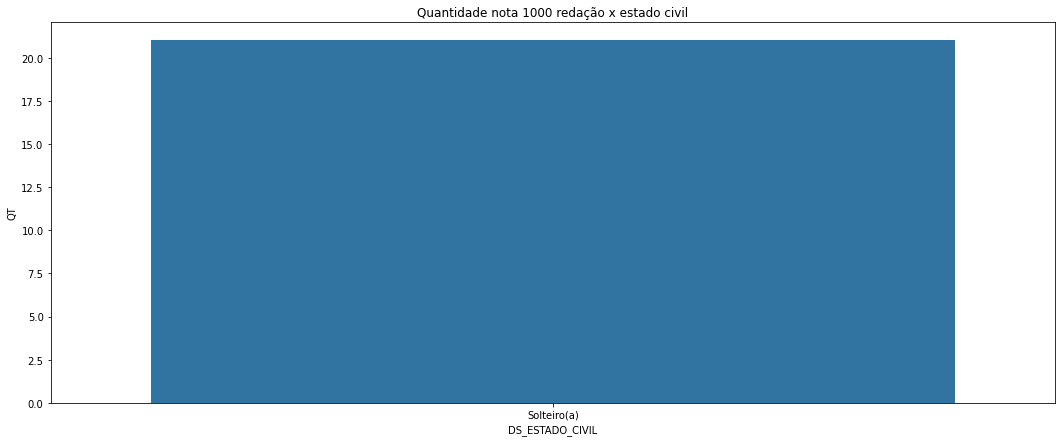

In [43]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x estado civil")
sns.barplot(x="DS_ESTADO_CIVIL", y="QT", data=df_redacao_qtd_estado_civil)
plt.show()

In [44]:
df_redacao_max["TP_COR_RACA"].value_counts(normalize=True)

1   0.95238
3   0.04762
Name: TP_COR_RACA, dtype: float64

In [45]:
def acerta_cor_raca(cor_raca):
  if cor_raca == 0:
    return "Não declarado"
  if cor_raca == 1:
    return "Branca"
  elif cor_raca == 2:
    return "Preta"
  elif cor_raca == 3:
    return "Parda"
  elif cor_raca == 4:
    return "Amarela"
  elif cor_raca == 5:
    return "Indígena"

In [46]:
df_redacao_max["TP_COR_RACA"] = df_redacao_max["TP_COR_RACA"].apply(acerta_cor_raca)
df_redacao_max["TP_COR_RACA"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10068       Parda
77754      Branca
129842     Branca
175279     Branca
248838     Branca
301089     Branca
334470     Branca
564673     Branca
604348     Branca
725913     Branca
899896     Branca
905609     Branca
998606     Branca
1022568    Branca
1193131    Branca
1397534    Branca
1402308    Branca
1655212    Branca
1810055    Branca
2125045    Branca
2224880    Branca
Name: TP_COR_RACA, dtype: object

In [47]:
df_redacao_qtd_cor_raca = df_redacao_max["TP_COR_RACA"].value_counts().reset_index().rename(columns={"TP_COR_RACA":"QT", "index":"TP_COR_RACA"}).sort_values(by="QT", ascending=False)
df_redacao_qtd_cor_raca

,TP_COR_RACA,QT
0,Branca,20
1,Parda,1


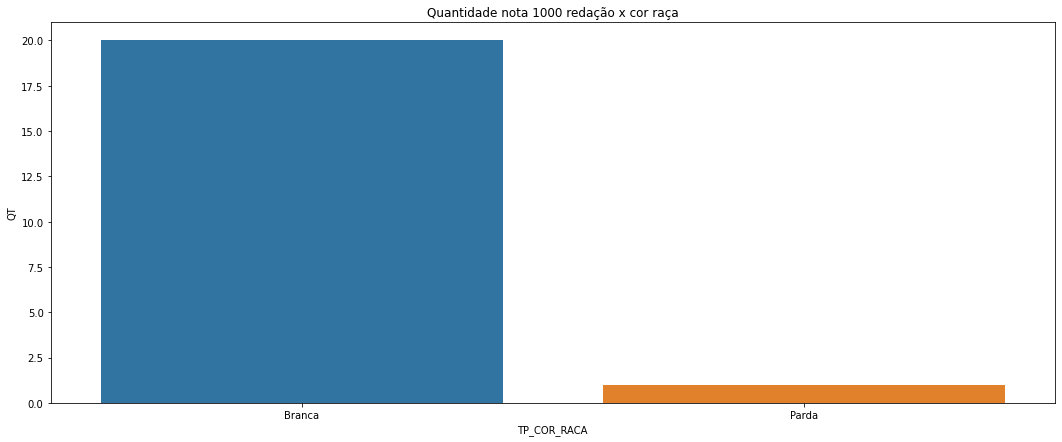

In [48]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x cor raça")
sns.barplot(x="TP_COR_RACA", y="QT", data=df_redacao_qtd_cor_raca)
plt.show()

In [49]:
df_redacao_max["TP_ESCOLA"].value_counts(normalize=True)

1   0.71429
3   0.23810
2   0.04762
Name: TP_ESCOLA, dtype: float64

In [50]:
def acerta_escola(escola):
  if escola == 1:
    return "Não Respondeu"
  elif escola == 2:
    return "Pública"
  elif escola == 3:
    return "Privada"

In [51]:
df_redacao_max["TP_ESCOLA"] = df_redacao_max["TP_ESCOLA"].apply(acerta_escola)
df_redacao_max["TP_ESCOLA"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10068            Privada
77754            Privada
129842     Não Respondeu
175279     Não Respondeu
248838     Não Respondeu
301089     Não Respondeu
334470           Privada
564673     Não Respondeu
604348     Não Respondeu
725913           Pública
899896     Não Respondeu
905609     Não Respondeu
998606     Não Respondeu
1022568    Não Respondeu
1193131    Não Respondeu
1397534          Privada
1402308    Não Respondeu
1655212    Não Respondeu
1810055          Privada
2125045    Não Respondeu
2224880    Não Respondeu
Name: TP_ESCOLA, dtype: object

In [52]:
df_redacao_qtd_tipo_escola = df_redacao_max["TP_ESCOLA"].value_counts().reset_index().rename(columns={"TP_ESCOLA":"QT", "index":"TP_ESCOLA"}).sort_values(by="QT", ascending=False)
df_redacao_qtd_tipo_escola

,TP_ESCOLA,QT
0,Não Respondeu,15
1,Privada,5
2,Pública,1


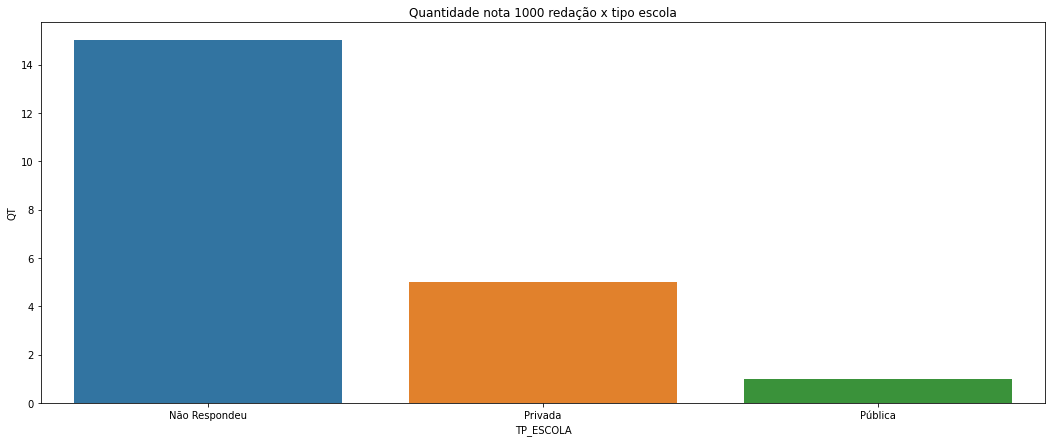

In [53]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x tipo escola")
sns.barplot(x="TP_ESCOLA", y="QT", data=df_redacao_qtd_tipo_escola)
plt.show()

In [54]:
df_redacao_max["IN_TREINEIRO"].value_counts(normalize=True)

0   0.95238
1   0.04762
Name: IN_TREINEIRO, dtype: float64

In [55]:
def acerta_treineiro(treineiro):
  if treineiro == 0:
    return "Não"
  if treineiro == 1:
    return "Sim"

In [56]:
df_redacao_max["IN_TREINEIRO"] = df_redacao_max["IN_TREINEIRO"].apply(acerta_treineiro)
df_redacao_max["IN_TREINEIRO"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10068      Não
77754      Não
129842     Sim
175279     Não
248838     Não
301089     Não
334470     Não
564673     Não
604348     Não
725913     Não
899896     Não
905609     Não
998606     Não
1022568    Não
1193131    Não
1397534    Não
1402308    Não
1655212    Não
1810055    Não
2125045    Não
2224880    Não
Name: IN_TREINEIRO, dtype: object

In [57]:
df_redacao_qtd_treineiro = df_redacao_max["IN_TREINEIRO"].value_counts().reset_index().rename(columns={"IN_TREINEIRO":"QT", "index":"IN_TREINEIRO"}).sort_values(by="QT", ascending=False)
df_redacao_qtd_treineiro

,IN_TREINEIRO,QT
0,Não,20
1,Sim,1


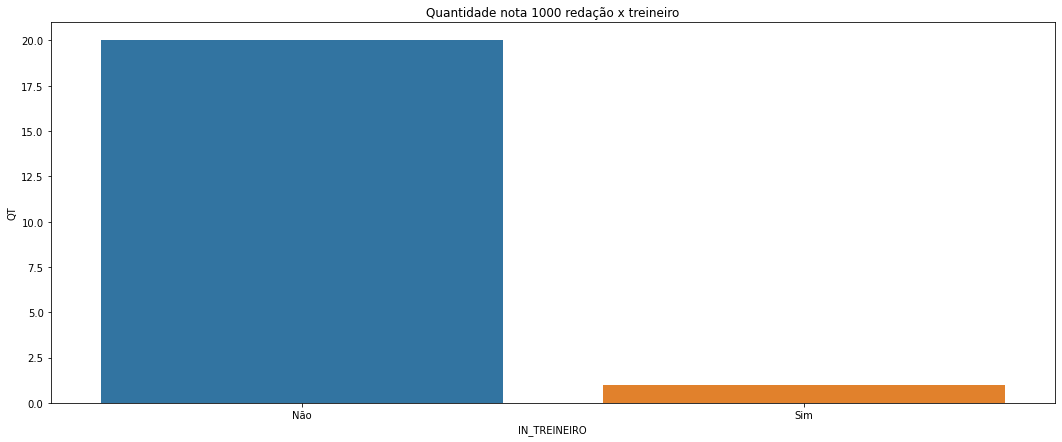

In [58]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x treineiro")
sns.barplot(x="IN_TREINEIRO", y="QT", data=df_redacao_qtd_treineiro)
plt.show()

In [59]:
df_redacao_max["TP_LINGUA"].value_counts(normalize=True)

0   0.80952
1   0.19048
Name: TP_LINGUA, dtype: float64

In [60]:
def acerta_tipo_lingua(tipo_lingua):
  if tipo_lingua == 0:
    return "Inglês"
  if tipo_lingua == 1:
    return "Espanhol"

In [61]:
df_redacao_max["TP_LINGUA"] = df_redacao_max["TP_LINGUA"].apply(acerta_tipo_lingua)
df_redacao_max["TP_LINGUA"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


10068        Inglês
77754        Inglês
129842       Inglês
175279       Inglês
248838     Espanhol
301089       Inglês
334470       Inglês
564673       Inglês
604348       Inglês
725913       Inglês
899896     Espanhol
905609     Espanhol
998606       Inglês
1022568    Espanhol
1193131      Inglês
1397534      Inglês
1402308      Inglês
1655212      Inglês
1810055      Inglês
2125045      Inglês
2224880      Inglês
Name: TP_LINGUA, dtype: object

In [62]:
df_redacao_qtd_tipo_lingua = df_redacao_max["TP_LINGUA"].value_counts().reset_index().rename(columns={"TP_LINGUA":"QT", "index":"TP_LINGUA"}).sort_values(by="QT", ascending=False)
df_redacao_qtd_tipo_lingua

,TP_LINGUA,QT
0,Inglês,17
1,Espanhol,4


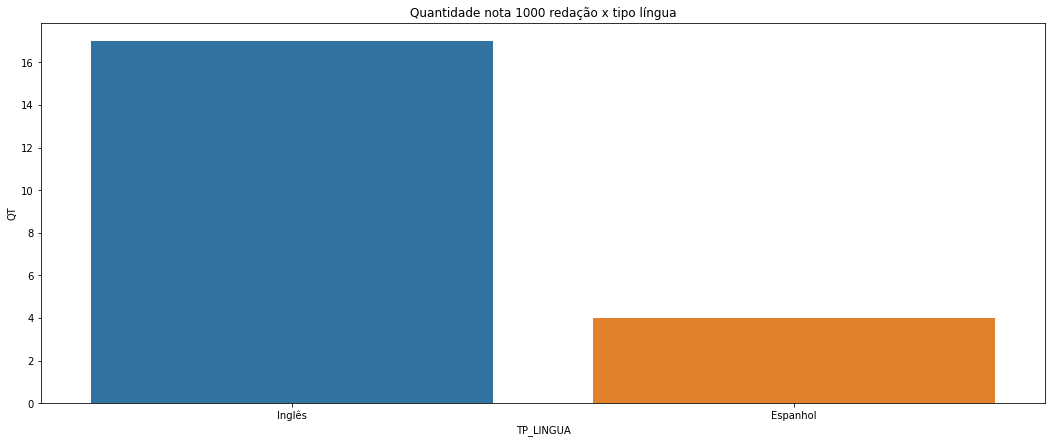

In [63]:
plt.figure(figsize=(18,7))
plt.title("Quantidade nota 1000 redação x tipo língua")
sns.barplot(x="TP_LINGUA", y="QT", data=df_redacao_qtd_tipo_lingua)
plt.show()

Dos candidatos que tiraram nota máxima na prova de redação, 80,95% escolheram Inglês.

## Analise gráfica Notas

In [64]:
# candidatos com nota maior que 0 e presentes em todos os dias

df_nota_presentes = df[((df["NU_NOTA_CN"] > 0) & (df["NU_NOTA_CH"] > 0) & (df["NU_NOTA_LC"] > 0) & (df["NU_NOTA_MT"] > 0) & (df["NU_NOTA_REDACAO"] > 0)) & 
                          ( (df["TP_PRESENCA_CN"] == 1) & (df["TP_PRESENCA_CH"] == 1) & (df["TP_PRESENCA_LC"] == 1) & (df["TP_PRESENCA_MT"] == 1) )]

print("Quantidade de candidatos com nota maior que zero e presentes todos os dia de aplicação das provas: {}".format(df_nota_presentes.shape[0]))

Quantidade de candidatos com nota maior que zero e presentes todos os dia de aplicação das provas: 1882601


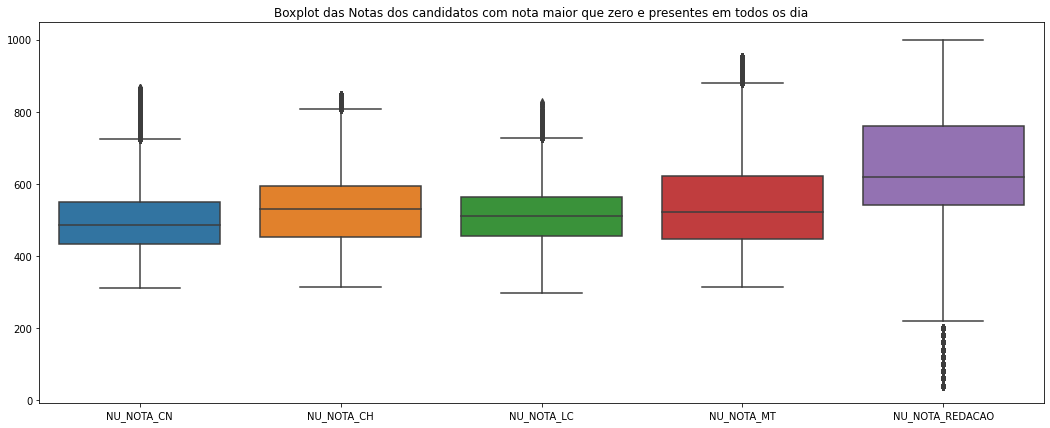

In [65]:
plt.figure(figsize=(18,7))
plt.title("Boxplot das Notas dos candidatos com nota maior que zero e presentes em todos os dia")
sns.boxplot(data=df_nota_presentes[notas])
plt.show()

In [66]:
df_nota_presentes[df_nota_presentes["NU_NOTA_REDACAO"] <= 200].sort_values(by="NU_NOTA_REDACAO", ascending=False)[notas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1618760,456.10000,415.20000,396.40000,417.10000,200.00000
910171,417.70000,385.50000,321.90000,380.90000,200.00000
2001519,421.00000,382.90000,362.30000,508.70000,200.00000
1560173,405.70000,526.70000,417.00000,461.30000,200.00000
895694,360.20000,426.10000,349.60000,474.30000,200.00000
...,...,...,...,...,...
960372,445.80000,441.70000,443.30000,439.60000,40.00000
982750,415.00000,494.80000,392.10000,387.00000,40.00000
988131,435.30000,357.00000,384.10000,404.40000,40.00000
2241889,365.30000,402.90000,355.20000,521.80000,40.00000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


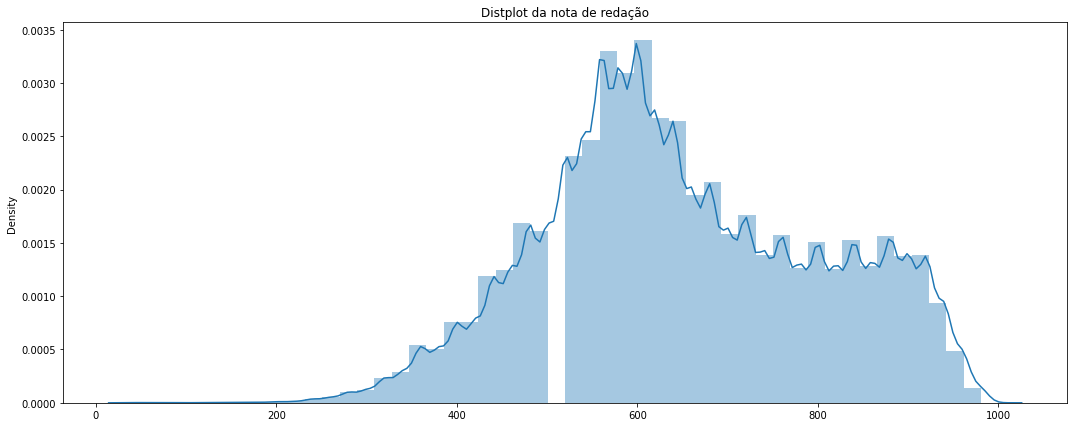

In [67]:
plt.figure(figsize=(18,7))
plt.title("Distplot da nota de redação")
sns.distplot(x=df_nota_presentes["NU_NOTA_REDACAO"])
plt.show()

In [68]:
df_grafico_raca = df_nota_presentes[["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "TP_COR_RACA"]]

In [69]:
df_grafico_raca["TP_COR_RACA"] = df_grafico_raca["TP_COR_RACA"].apply(acerta_cor_raca)
df_grafico_raca["TP_COR_RACA"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1                 Branca
3                  Parda
4                  Parda
8                  Parda
9                  Parda
               ...      
2685044            Parda
2685046            Preta
2685048           Branca
2685049            Parda
2685051    Não declarado
Name: TP_COR_RACA, Length: 1882601, dtype: object

In [70]:
df_grafico_raca

,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_COR_RACA
1,461.50000,498.30000,560.00000,Branca
3,659.50000,638.90000,780.00000,Parda
4,582.60000,457.60000,780.00000,Parda
8,493.40000,450.70000,520.00000,Parda
9,413.30000,494.60000,380.00000,Parda
...,...,...,...,...
2685044,407.40000,542.60000,540.00000,Parda
2685046,394.80000,424.60000,560.00000,Preta
2685048,731.30000,663.20000,680.00000,Branca
2685049,599.90000,510.80000,800.00000,Parda


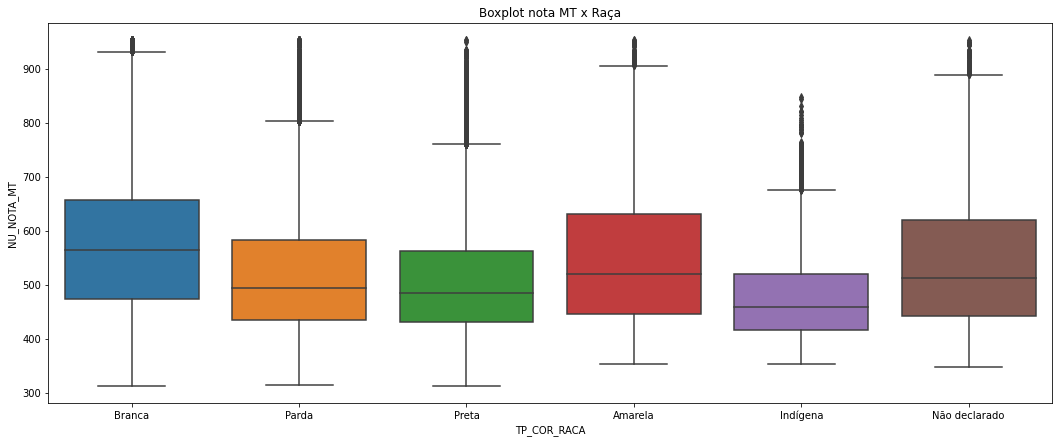

In [71]:
plt.figure(figsize=(18,7))
plt.title("Boxplot nota MT x Raça")
sns.boxplot(data=df_grafico_raca, y="NU_NOTA_MT", x="TP_COR_RACA")
plt.show()

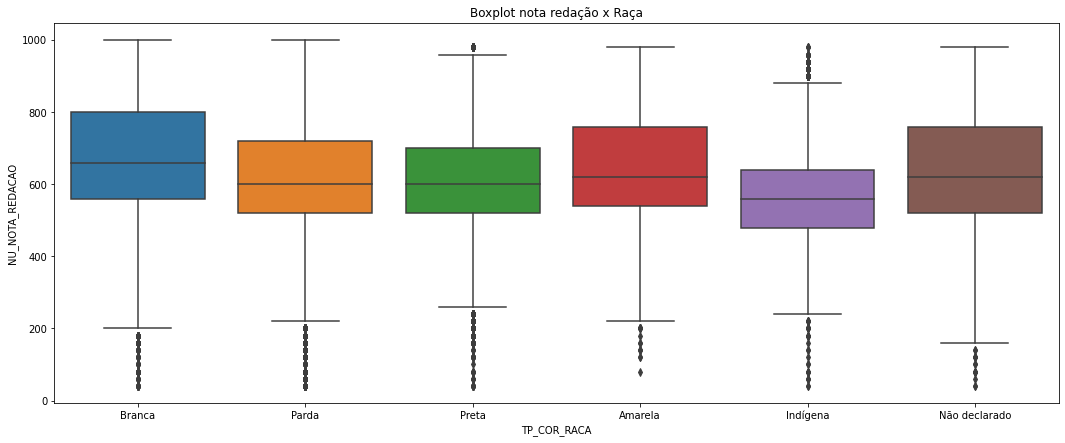

In [72]:
plt.figure(figsize=(18,7))
plt.title("Boxplot nota redação x Raça")
sns.boxplot(data=df_grafico_raca, y="NU_NOTA_REDACAO", x="TP_COR_RACA")
plt.show()

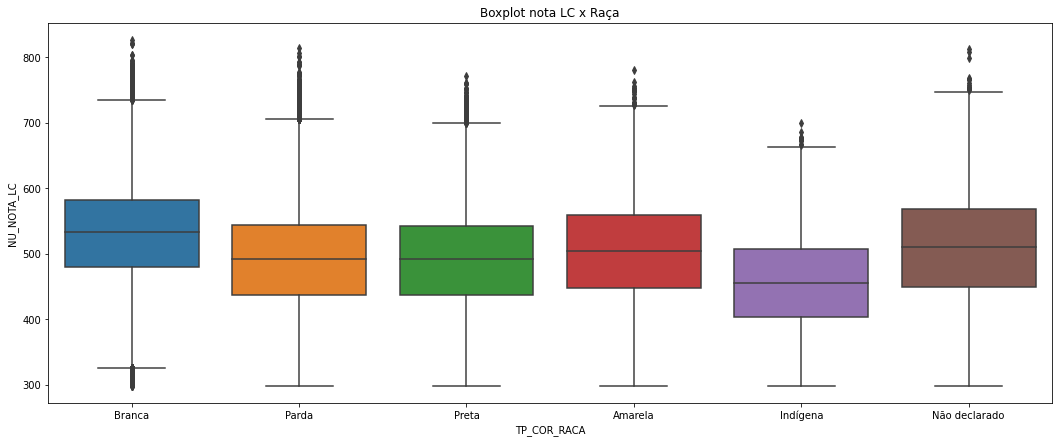

In [73]:
plt.figure(figsize=(18,7))
plt.title("Boxplot nota LC x Raça")
sns.boxplot(data=df_grafico_raca, y="NU_NOTA_LC", x="TP_COR_RACA")
plt.show()

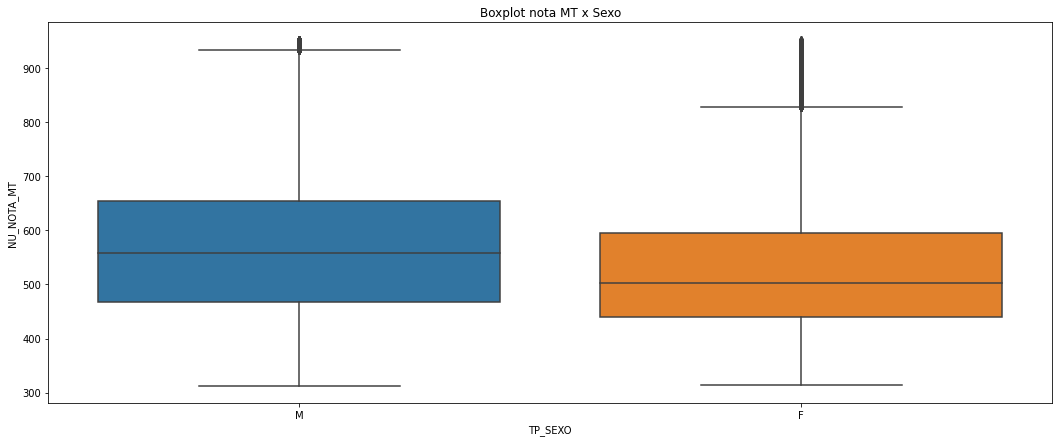

In [74]:
plt.figure(figsize=(18,7))
plt.title("Boxplot nota MT x Sexo")
sns.boxplot(data=df_nota_presentes, y="NU_NOTA_MT", x="TP_SEXO")
plt.show()

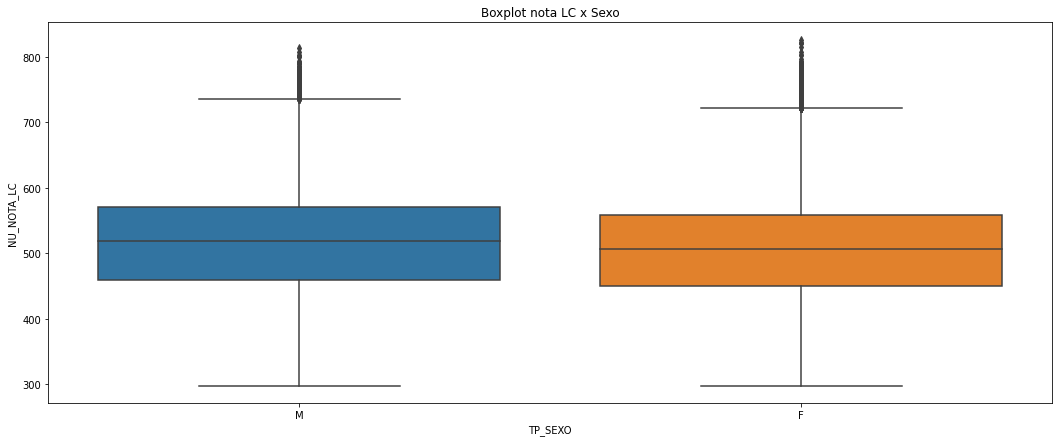

In [75]:
plt.figure(figsize=(18,7))
plt.title("Boxplot nota LC x Sexo")
sns.boxplot(data=df_nota_presentes, y="NU_NOTA_LC", x="TP_SEXO")
plt.show()

In [76]:
df_nota_presentes.isna().sum()[notas]

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
dtype: int64

## Correlação

In [77]:
# metodo corr desconsidera NaN by default

corr = df_nota_presentes[notas].corr()
corr

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00000,0.69094,0.67274,0.68227,0.51582
NU_NOTA_CH,0.69094,1.00000,0.75800,0.64049,0.52370
NU_NOTA_LC,0.67274,0.75800,1.00000,0.63985,0.54267
NU_NOTA_MT,0.68227,0.64049,0.63985,1.00000,0.53479
NU_NOTA_REDACAO,0.51582,0.52370,0.54267,0.53479,1.00000


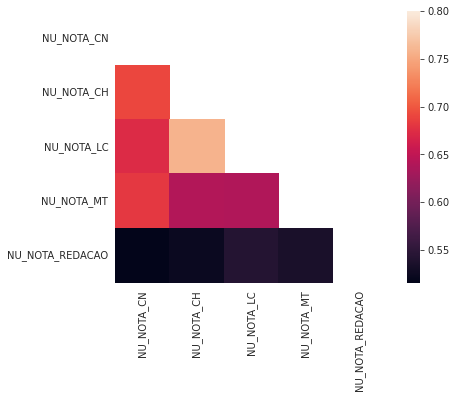

In [78]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.8, square=True)

Buscando entender se existe correlação entre as notas de redação e Linguagens e Códigos (0.54267) e Matemática (0.53479).

Maior correlação entre as notas Linguagens e Códigos e Ciências Humanas (0.75800)

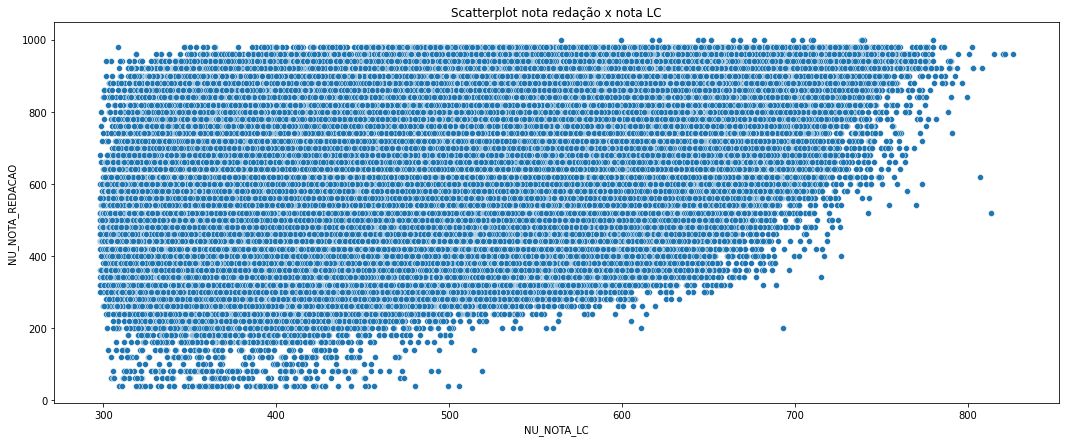

In [79]:
plt.figure(figsize=(18,7))
plt.title("Scatterplot nota redação x nota LC")
sns.scatterplot(data=df_nota_presentes[notas], x="NU_NOTA_LC", y="NU_NOTA_REDACAO")
plt.show()

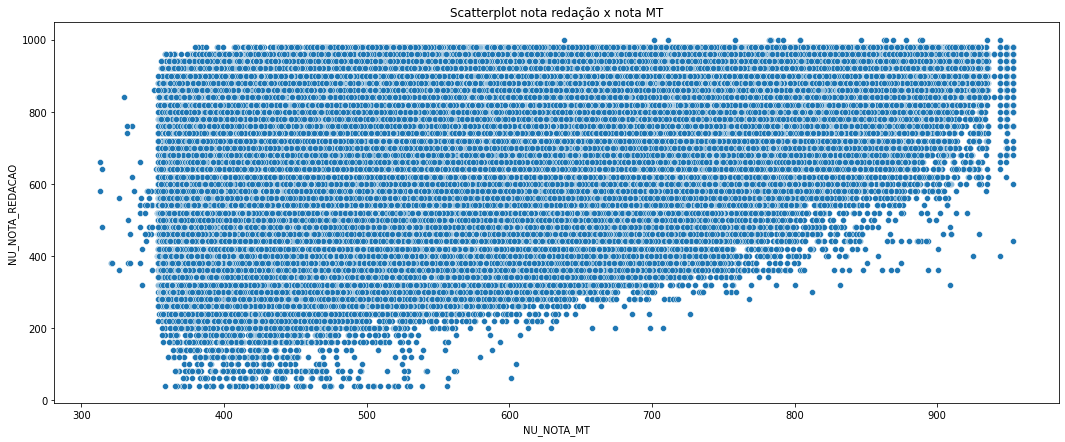

In [80]:
plt.figure(figsize=(18,7))
plt.title("Scatterplot nota redação x nota MT")
sns.scatterplot(data=df_nota_presentes[notas], x="NU_NOTA_MT", y="NU_NOTA_REDACAO")
plt.show()

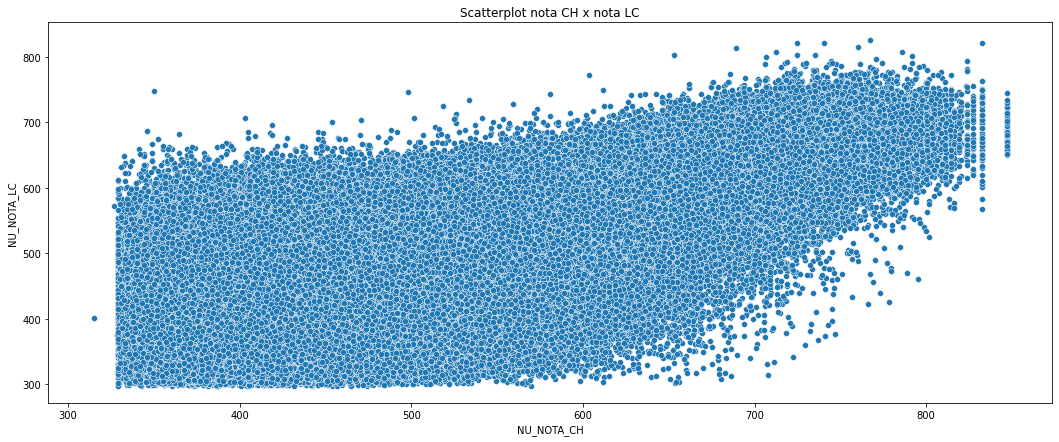

In [81]:
plt.figure(figsize=(18,7))
plt.title("Scatterplot nota CH x nota LC")
sns.scatterplot(data=df_nota_presentes[notas], x="NU_NOTA_CH", y="NU_NOTA_LC")
plt.show()

Apesar de existir correlação entre as notas de Linguagens e Códigos e Matemática com a nota de redação.

No gráfico confirmamos que as notas de Linguagens e Códigos e Ciências Humanas possuem maior correlação.

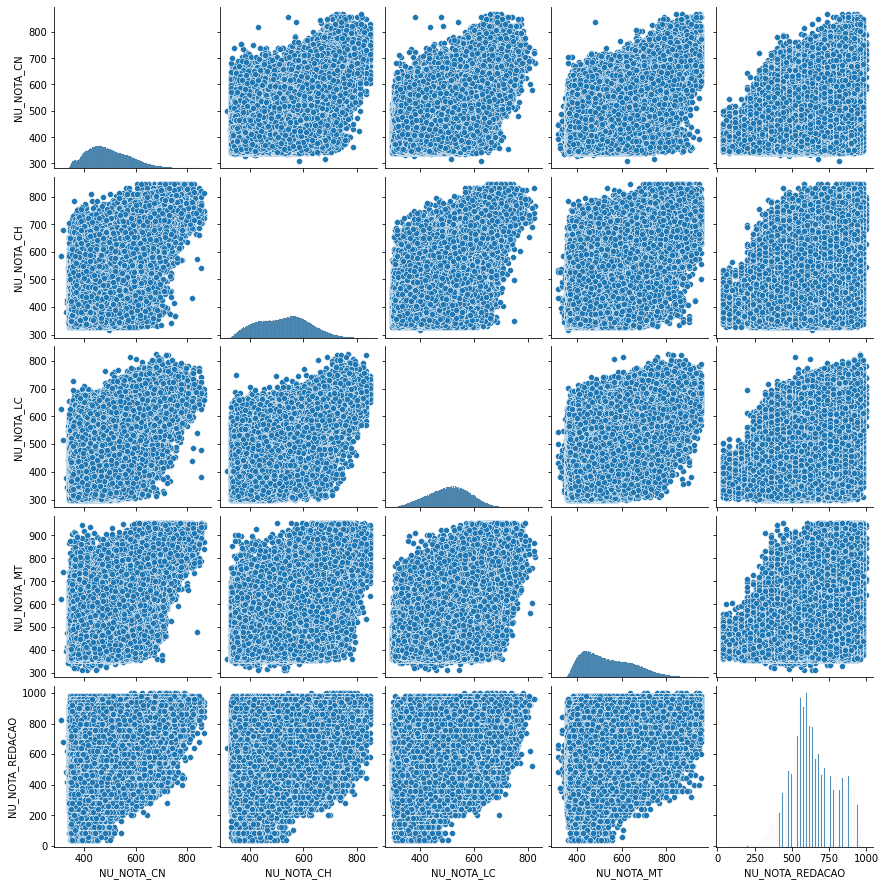

In [82]:
sns.pairplot(df_nota_presentes[notas])

## Analisar presença

As provas foram aplicadas nos dias 21 e 28 de novembro no formato impresso e digital.

E foram reaplicadas no dias 9 e 16 de janeiro para aqueles que estavam inscritos no regular mas que tiveram a aplicação prejudicada de alguma forma e também pessoas privadas de liberdade.

1º Dia: LC, Redação, CH

2º Dia: CN, MT

Fontes:

https://agenciabrasil.ebc.com.br/educacao/noticia/2022-01/termina-hoje-reaplicacao-do-enem-2021

https://g1.globo.com/educacao/enem/2021/noticia/2021/12/01/enem-2021-veja-integra-dos-cadernos-de-prova.ghtml

In [83]:
# 1º dia
presenca_lc = df["TP_PRESENCA_LC"].value_counts()
presenca_ch = df["TP_PRESENCA_CH"].value_counts()

# 2º dia
presenca_cn = df["TP_PRESENCA_CN"].value_counts()
presenca_mt = df["TP_PRESENCA_MT"].value_counts()

qt_ausente = presenca_lc[1]-presenca_cn[1]
pc_ausente = qt_ausente / presenca_lc[1] * 100

print("Quantidade de ausentes no 2º dia: {} ".format(qt_ausente))
print("% de ausentes no 2º dia: {}".format(pc_ausente))

Quantidade de ausentes no 2º dia: 101070 
% de ausentes no 2º dia: 4.950109537152269


In [84]:
lc = presenca_lc.reset_index()
ch = presenca_ch.reset_index()
cn = presenca_cn.reset_index()
mt = presenca_mt.reset_index()

lc_ch = lc.merge(ch)
lc_ch_cn = lc_ch.merge(cn)
lc_ch_cn_mt = lc_ch_cn.merge(mt)

lc_ch_cn_mt.rename(columns={"index":"STATUS"}, inplace=True)

lc_ch_cn_mt

,STATUS,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_MT
0,1,2041773,2041773,1940703,1940703
1,0,639883,639883,743149,743149
2,2,3397,3397,1201,1201


In [85]:
lc_ch_cn_mt.replace(0,"Faltou", inplace=True)
lc_ch_cn_mt.replace(1,"Presente", inplace=True)
lc_ch_cn_mt.replace(2,"Eliminado", inplace=True)

lc_ch_cn_mt

,STATUS,TP_PRESENCA_LC,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_MT
0,Presente,2041773,2041773,1940703,1940703
1,Faltou,639883,639883,743149,743149
2,Eliminado,3397,3397,1201,1201


In [86]:
# NaN é a soma dos alunos que faltaram e foram eliminados

lc_ch_cn_mt[(lc_ch_cn_mt["STATUS"] == "Faltou") | (lc_ch_cn_mt["STATUS"] == "Eliminado")].sum()

STATUS            FaltouEliminado
TP_PRESENCA_LC             643280
TP_PRESENCA_CH             643280
TP_PRESENCA_CN             744350
TP_PRESENCA_MT             744350
dtype: object

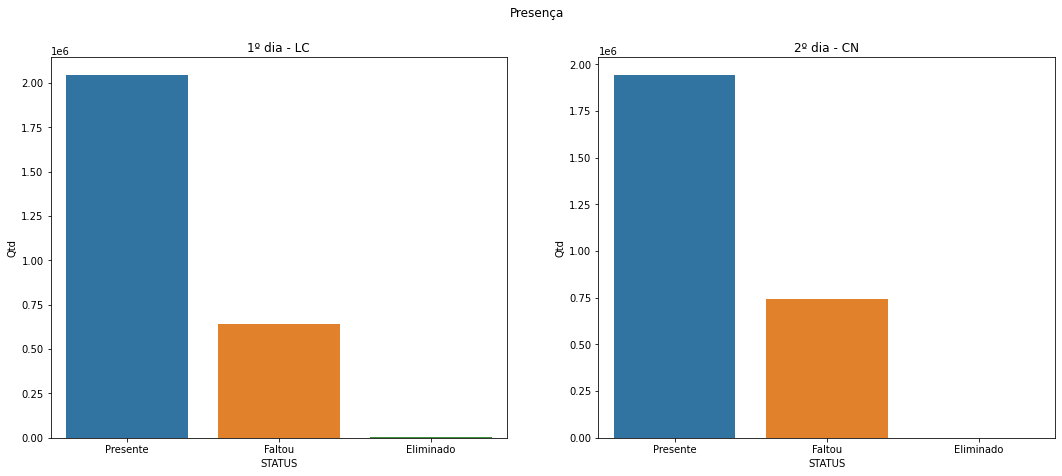

In [87]:
# Gráfico para comparar a presença entre o 1º e 2º dia

fig, axes = plt.subplots(1,2,figsize=(18,7))
sns.barplot(x="STATUS", y="TP_PRESENCA_LC", data=lc_ch_cn_mt, ax=axes[0])
sns.barplot(x="STATUS", y="TP_PRESENCA_CN", data=lc_ch_cn_mt, ax=axes[1])
fig.suptitle("Presença")
axes[0].set_title("1º dia - LC")
axes[1].set_title("2º dia - CN")

for ax in axes.flat:
  ax.set(ylabel="Qtd")

plt.show()

In [88]:
# candidatos presentes em todos os dias

df_candidatos_presentes = df[(df["TP_PRESENCA_CN"] == 1) & (df["TP_PRESENCA_CH"] == 1) & (df["TP_PRESENCA_LC"] == 1) & (df["TP_PRESENCA_MT"] == 1)]
df_candidatos_presentes[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
1,505.90000,551.80000,498.30000,461.50000,560.00000,1,1,1,1,1.00000
3,580.70000,678.90000,638.90000,659.50000,780.00000,1,1,1,1,1.00000
4,497.70000,532.40000,457.60000,582.60000,780.00000,1,1,1,1,1.00000
8,487.40000,476.50000,450.70000,493.40000,520.00000,1,1,1,1,1.00000
9,507.60000,539.20000,494.60000,413.30000,380.00000,1,1,1,1,1.00000
...,...,...,...,...,...,...,...,...,...,...
2685044,437.60000,516.70000,542.60000,407.40000,540.00000,1,1,1,1,1.00000
2685046,484.60000,434.80000,424.60000,394.80000,560.00000,1,1,1,1,1.00000
2685048,626.30000,672.20000,663.20000,731.30000,680.00000,1,1,1,1,1.00000
2685049,535.20000,461.60000,510.80000,599.90000,800.00000,1,1,1,1,1.00000


In [89]:
print("Quantidade de candidatos presentes nos dois dias de aplicação das provas: {}".format(df_candidatos_presentes.shape[0]))

Quantidade de candidatos presentes nos dois dias de aplicação das provas: 1934541


In [90]:
# candidatos presentes apenas no 1º dia

df_candidatos_presentes_1 = df[(df["TP_PRESENCA_CN"] == 0) & (df["TP_PRESENCA_CH"] == 1) & (df["TP_PRESENCA_LC"] == 1) & (df["TP_PRESENCA_MT"] == 0)]
df_candidatos_presentes_1[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
0,NaN,574.60000,472.60000,NaN,760.00000,0,1,1,0,1.00000
6,NaN,511.90000,420.40000,NaN,480.00000,0,1,1,0,1.00000
110,NaN,429.30000,449.30000,NaN,580.00000,0,1,1,0,1.00000
116,NaN,570.50000,574.10000,NaN,560.00000,0,1,1,0,1.00000
117,NaN,431.00000,440.10000,NaN,420.00000,0,1,1,0,1.00000
...,...,...,...,...,...,...,...,...,...,...
2684876,NaN,356.60000,378.40000,NaN,360.00000,0,1,1,0,1.00000
2684946,NaN,580.20000,420.90000,NaN,680.00000,0,1,1,0,1.00000
2684950,NaN,608.00000,583.60000,NaN,800.00000,0,1,1,0,1.00000
2684997,NaN,453.00000,408.40000,NaN,380.00000,0,1,1,0,1.00000


In [91]:
print("Quantidade de candidatos presentes apenas no 1º dia de aplicação das provas: {}".format(df_candidatos_presentes_1.shape[0]))

Quantidade de candidatos presentes apenas no 1º dia de aplicação das provas: 106050


In [92]:
# candidatos presentes apenas no 2º dia

df_candidatos_presentes_2 = df[(df["TP_PRESENCA_CN"] == 1) & (df["TP_PRESENCA_CH"] == 0) & (df["TP_PRESENCA_LC"] == 0) & (df["TP_PRESENCA_MT"] == 1)]
df_candidatos_presentes_2[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
333,351.50000,NaN,NaN,392.50000,NaN,1,0,0,1,NaN
512,483.50000,NaN,NaN,492.80000,NaN,1,0,0,1,NaN
1163,672.50000,NaN,NaN,944.10000,NaN,1,0,0,1,NaN
2194,348.20000,NaN,NaN,422.60000,NaN,1,0,0,1,NaN
3438,560.50000,NaN,NaN,623.30000,NaN,1,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
2683021,423.50000,NaN,NaN,424.30000,NaN,1,0,0,1,NaN
2683736,387.30000,NaN,NaN,550.90000,NaN,1,0,0,1,NaN
2683999,383.10000,NaN,NaN,802.40000,NaN,1,0,0,1,NaN
2684215,447.00000,NaN,NaN,414.40000,NaN,1,0,0,1,NaN


In [93]:
print("Quantidade de candidatos presentes apenas no 2º dia de aplicação das provas: {}".format(df_candidatos_presentes_2.shape[0]))

Quantidade de candidatos presentes apenas no 2º dia de aplicação das provas: 5719


In [94]:
# candidatos ausentes em todos os dias

df_candidatos_ausentes = df[(df["TP_PRESENCA_CN"] == 0) & (df["TP_PRESENCA_CH"] == 0) & (df["TP_PRESENCA_LC"] == 0) & (df["TP_PRESENCA_MT"] == 0)]
df_candidatos_ausentes[nota_presenca]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_STATUS_REDACAO
2,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
5,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
13,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
14,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
2685038,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
2685039,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
2685045,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
2685047,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN


In [95]:
print("Quantidade de candidatos ausentes nos dois dias de aplicação das provas: {}".format(df_candidatos_ausentes.shape[0]))

Quantidade de candidatos ausentes nos dois dias de aplicação das provas: 634151


In [96]:
# candidatos ausentes e que o município da escola é diferente do município onde foi aplicada a prova

df_candidatos_ausentes_municipio_diferentes = df_candidatos_ausentes[ (~df_candidatos_ausentes["NO_MUNICIPIO_ESC"].isna()) & (df_candidatos_ausentes["NO_MUNICIPIO_ESC"] != df_candidatos_ausentes["NO_MUNICIPIO_PROVA"])][["SG_UF_ESC", "NO_MUNICIPIO_ESC", "SG_UF_PROVA", "NO_MUNICIPIO_PROVA"]]
df_candidatos_ausentes_municipio_diferentes

,SG_UF_ESC,NO_MUNICIPIO_ESC,SG_UF_PROVA,NO_MUNICIPIO_PROVA
480,PB,Massaranduba,PB,Campina Grande
852,RS,Glorinha,RS,Gravataí
859,GO,Rio Verde,GO,Goiânia
957,CE,Aquiraz,CE,Fortaleza
1364,GO,Goianápolis,GO,Anápolis
...,...,...,...,...
2684357,PB,Carrapateira,PB,São José de Piranhas
2684780,PR,Tibagi,PR,Ponta Grossa
2684866,TO,Cariri do Tocantins,TO,Gurupi
2684927,SP,Arandu,SP,São Paulo


In [97]:
print("Quantidade de candidatos ausentes nos dois dias de aplicação das provas e município da escola e prova diferentes: {}".format(df_candidatos_ausentes_municipio_diferentes.shape[0]))

Quantidade de candidatos ausentes nos dois dias de aplicação das provas e município da escola e prova diferentes: 32665


In [98]:
# candidatos que foram apenas no 1º dia e que o município da escola é diferente do município onde foi aplicada a prova

df_candidatos_presentes_1_municipio_diferentes = df_candidatos_presentes_1[ (~df_candidatos_presentes_1["NO_MUNICIPIO_ESC"].isna()) & (df_candidatos_presentes_1["NO_MUNICIPIO_ESC"] != df_candidatos_presentes_1["NO_MUNICIPIO_PROVA"])][["SG_UF_ESC", "NO_MUNICIPIO_ESC", "SG_UF_PROVA", "NO_MUNICIPIO_PROVA"]]
df_candidatos_presentes_1_municipio_diferentes

,SG_UF_ESC,NO_MUNICIPIO_ESC,SG_UF_PROVA,NO_MUNICIPIO_PROVA
110,RJ,Nilópolis,RJ,Mesquita
205,MA,Nova Olinda do Maranhão,MA,Santa Luzia do Paruá
2808,RJ,Pinheiral,RJ,Volta Redonda
4720,SP,Ouro Verde,SP,Dracena
5202,RJ,Mesquita,RJ,Japeri
...,...,...,...,...
2682771,MG,Córrego Fundo,MG,Formiga
2682859,PE,Jaboatão dos Guararapes,PE,Recife
2683386,RJ,Aperibé,RJ,Itaocara
2684015,SE,Cristinápolis,SE,Umbaúba


In [99]:
print("Quantidade de candidatos presentes apenas no 1º dia de aplicação das provas e município da escola e prova diferentes: {}".format(df_candidatos_presentes_1_municipio_diferentes.shape[0]))

Quantidade de candidatos presentes apenas no 1º dia de aplicação das provas e município da escola e prova diferentes: 4026


Referências:

~NaN -> https://thispointer.com/pandas-select-rows-without-nan-values/

## Analise questionário socioeconômico

In [100]:
# Analise questionário socioeconômico

df_nota_presentes[notas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
1,505.90000,551.80000,498.30000,461.50000,560.00000
3,580.70000,678.90000,638.90000,659.50000,780.00000
4,497.70000,532.40000,457.60000,582.60000,780.00000
8,487.40000,476.50000,450.70000,493.40000,520.00000
9,507.60000,539.20000,494.60000,413.30000,380.00000
...,...,...,...,...,...
2685044,437.60000,516.70000,542.60000,407.40000,540.00000
2685046,484.60000,434.80000,424.60000,394.80000,560.00000
2685048,626.30000,672.20000,663.20000,731.30000,680.00000
2685049,535.20000,461.60000,510.80000,599.90000,800.00000


In [101]:
# cópia do df_nota_presentes

df_nota_presentes_soma = df_nota_presentes.copy()

In [102]:
# somatoria de todas as notas

df_nota_presentes_soma["NU_NOTA_SOMA"] = df_nota_presentes["NU_NOTA_CN"] + df_nota_presentes["NU_NOTA_CH"] + df_nota_presentes["NU_NOTA_LC"] + df_nota_presentes["NU_NOTA_MT"] + df_nota_presentes["NU_NOTA_REDACAO"]

notas.append("NU_NOTA_SOMA")

df_nota_presentes_soma[notas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_SOMA
1,505.90000,551.80000,498.30000,461.50000,560.00000,2577.50000
3,580.70000,678.90000,638.90000,659.50000,780.00000,3338.00000
4,497.70000,532.40000,457.60000,582.60000,780.00000,2850.30000
8,487.40000,476.50000,450.70000,493.40000,520.00000,2428.00000
9,507.60000,539.20000,494.60000,413.30000,380.00000,2334.70000
...,...,...,...,...,...,...
2685044,437.60000,516.70000,542.60000,407.40000,540.00000,2444.30000
2685046,484.60000,434.80000,424.60000,394.80000,560.00000,2298.80000
2685048,626.30000,672.20000,663.20000,731.30000,680.00000,3373.00000
2685049,535.20000,461.60000,510.80000,599.90000,800.00000,2907.50000


### Q001 Até que série seu pai, ou o homem responsável por você, estudou?

In [103]:
df_nota_presentes_soma_q001 = df_nota_presentes_soma[["NU_NOTA_SOMA", "Q001"]]
df_nota_presentes_soma_q001

,NU_NOTA_SOMA,Q001
1,2577.50000,B
3,3338.00000,B
4,2850.30000,D
8,2428.00000,B
9,2334.70000,D
...,...,...
2685044,2444.30000,B
2685046,2298.80000,H
2685048,3373.00000,G
2685049,2907.50000,D


In [104]:
# criar função para incluir coluna com descrição

def acerta_q001(q001):
  if q001 == "A":
    return "Nunca estudou"
  elif q001 == "B":
    return "Não completou a 4ª série/5º ano do Ensino Fundamental"
  elif q001 == "C":
    return "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental"
  elif q001 == "D":
    return "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio"
  elif q001 == "E":
    return "Completou o Ensino Médio, mas não completou a Faculdade"
  elif q001 == "F":
    return "Completou a Faculdade, mas não completou a Pós-graduação"
  elif q001 == "G":
    return "Completou a Pós-graduação"
  elif q001 == "H":
    return "Não sei"

In [105]:
df_nota_presentes_soma_q001["DS_Q001"] = df_nota_presentes_soma_q001["Q001"].apply(acerta_q001)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
df_nota_presentes_soma_q001.sample(10)

,NU_NOTA_SOMA,Q001,DS_Q001
530940,2888.50000,E,"Completou o Ensino Médio, mas não completou a ..."
1860518,3513.10000,G,Completou a Pós-graduação
684328,2183.90000,H,Não sei
362582,3308.30000,B,Não completou a 4ª série/5º ano do Ensino Fund...
261500,1829.40000,E,"Completou o Ensino Médio, mas não completou a ..."
606011,2370.50000,E,"Completou o Ensino Médio, mas não completou a ..."
1233114,2777.00000,E,"Completou o Ensino Médio, mas não completou a ..."
1684286,2232.70000,E,"Completou o Ensino Médio, mas não completou a ..."
377359,2372.30000,F,"Completou a Faculdade, mas não completou a Pós..."
2112978,2402.10000,B,Não completou a 4ª série/5º ano do Ensino Fund...


In [107]:
# verificar quem não respondeu

df_nota_presentes_soma_q001[df_nota_presentes_soma_q001.isna()["DS_Q001"]]

,NU_NOTA_SOMA,Q001,DS_Q001
707314,2336.40000,NaN,None


In [108]:
df_nota_presentes_soma_q001.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [109]:
df_nota_presentes_soma_q001["DS_Q001"].value_counts().reset_index().rename(columns={"index":"DS_Q001", "DS_Q001": "QT"})

,DS_Q001,QT
0,"Completou o Ensino Médio, mas não completou a ...",581049
1,Não completou a 4ª série/5º ano do Ensino Fund...,282970
2,"Completou a 4ª série/5º ano, mas não completou...",235531
3,"Completou a Faculdade, mas não completou a Pós...",212641
4,Completou a 8ª série/9º ano do Ensino Fundamen...,208041
5,Completou a Pós-graduação,159889
6,Não sei,142855
7,Nunca estudou,59624


In [110]:
df_nota_presentes_soma_q001["DS_Q001"].value_counts(normalize=True).reset_index().rename(columns={"index":"DS_Q001", "DS_Q001": "PC"})

,DS_Q001,PC
0,"Completou o Ensino Médio, mas não completou a ...",0.30864
1,Não completou a 4ª série/5º ano do Ensino Fund...,0.15031
2,"Completou a 4ª série/5º ano, mas não completou...",0.12511
3,"Completou a Faculdade, mas não completou a Pós...",0.11295
4,Completou a 8ª série/9º ano do Ensino Fundamen...,0.11051
5,Completou a Pós-graduação,0.08493
6,Não sei,0.07588
7,Nunca estudou,0.03167


In [111]:
sort_unique_q001 = df_nota_presentes_soma_q001.sort_values("Q001")["DS_Q001"].unique()

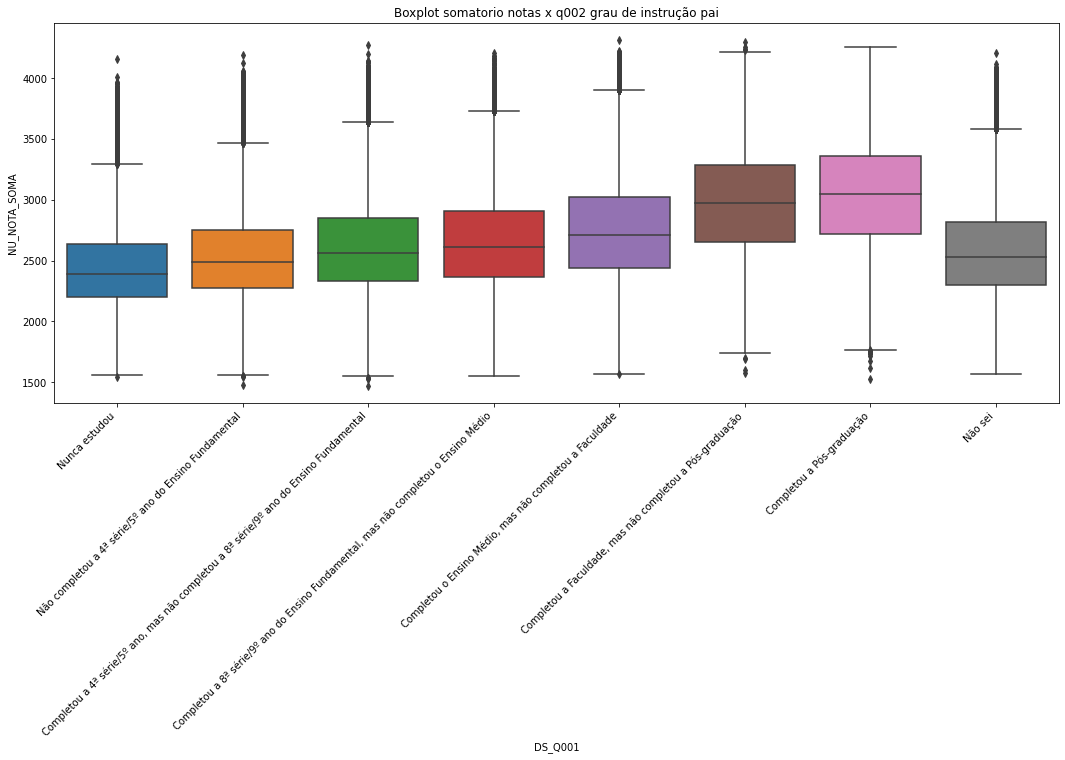

In [112]:
plt.figure(figsize=(18,7))
plt.title("Boxplot somatorio notas x q002 grau de instrução pai")
chart = sns.boxplot(data=df_nota_presentes_soma_q001, y="NU_NOTA_SOMA", x="DS_Q001", order=sort_unique_q001)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

É visivel que quanto maior escolaridade do pai maior somatorio de notas do candidato.

### Q002 Até que série sua mãe, ou a mulher responsável por você, estudou?

In [113]:
df_nota_presentes_soma_q002 = df_nota_presentes_soma[["NU_NOTA_SOMA", "Q002"]]
df_nota_presentes_soma_q002

,NU_NOTA_SOMA,Q002
1,2577.50000,B
3,3338.00000,B
4,2850.30000,E
8,2428.00000,B
9,2334.70000,D
...,...,...
2685044,2444.30000,G
2685046,2298.80000,E
2685048,3373.00000,G
2685049,2907.50000,D


In [114]:
# criar função para incluir coluna com descrição

def acerta_q002(q002):
  if q002 == "A":
    return "Nunca estudou"
  elif q002 == "B":
    return "Não completou a 4ª série/5º ano do Ensino Fundamental"
  elif q002 == "C":
    return "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental"
  elif q002 == "D":
    return "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio"
  elif q002 == "E":
    return "Completou o Ensino Médio, mas não completou a Faculdade"
  elif q002 == "F":
    return "Completou a Faculdade, mas não completou a Pós-graduação"
  elif q002 == "G":
    return "Completou a Pós-graduação"
  elif q002 == "H":
    return "Não sei"

In [115]:
df_nota_presentes_soma_q002["DS_Q002"] = df_nota_presentes_soma_q002["Q002"].apply(acerta_q002)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
df_nota_presentes_soma_q002.sample(10)

,NU_NOTA_SOMA,Q002,DS_Q002
1389260,2693.60000,E,"Completou o Ensino Médio, mas não completou a ..."
214776,2459.20000,D,Completou a 8ª série/9º ano do Ensino Fundamen...
1599398,2372.10000,F,"Completou a Faculdade, mas não completou a Pós..."
852728,2834.10000,C,"Completou a 4ª série/5º ano, mas não completou..."
1112268,3076.20000,C,"Completou a 4ª série/5º ano, mas não completou..."
2145,2381.00000,E,"Completou o Ensino Médio, mas não completou a ..."
1045956,2469.60000,E,"Completou o Ensino Médio, mas não completou a ..."
1732058,3217.20000,G,Completou a Pós-graduação
235824,2792.10000,B,Não completou a 4ª série/5º ano do Ensino Fund...
2286824,3518.00000,F,"Completou a Faculdade, mas não completou a Pós..."


In [117]:
# verificar quem não respondeu

df_nota_presentes_soma_q002[df_nota_presentes_soma_q002.isna()["DS_Q002"]]

,NU_NOTA_SOMA,Q002,DS_Q002
707314,2336.40000,NaN,None


In [118]:
df_nota_presentes_soma_q002.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [119]:
df_nota_presentes_soma_q002["DS_Q002"].value_counts().reset_index().rename(columns={"index":"DS_Q002", "DS_Q002": "QT"})

,DS_Q002,QT
0,"Completou o Ensino Médio, mas não completou a ...",675969
1,"Completou a Faculdade, mas não completou a Pós...",276039
2,Completou a Pós-graduação,268079
3,Completou a 8ª série/9º ano do Ensino Fundamen...,206629
4,Não completou a 4ª série/5º ano do Ensino Fund...,193465
5,"Completou a 4ª série/5º ano, mas não completou...",186778
6,Não sei,39482
7,Nunca estudou,36159


In [120]:
df_nota_presentes_soma_q002["DS_Q002"].value_counts(normalize=True).reset_index().rename(columns={"index":"DS_Q002", "DS_Q002": "PC"})

,DS_Q002,PC
0,"Completou o Ensino Médio, mas não completou a ...",0.35906
1,"Completou a Faculdade, mas não completou a Pós...",0.14663
2,Completou a Pós-graduação,0.14240
3,Completou a 8ª série/9º ano do Ensino Fundamen...,0.10976
4,Não completou a 4ª série/5º ano do Ensino Fund...,0.10276
5,"Completou a 4ª série/5º ano, mas não completou...",0.09921
6,Não sei,0.02097
7,Nunca estudou,0.01921


In [121]:
sort_unique_q002 = df_nota_presentes_soma_q002.sort_values("Q002")["DS_Q002"].unique()

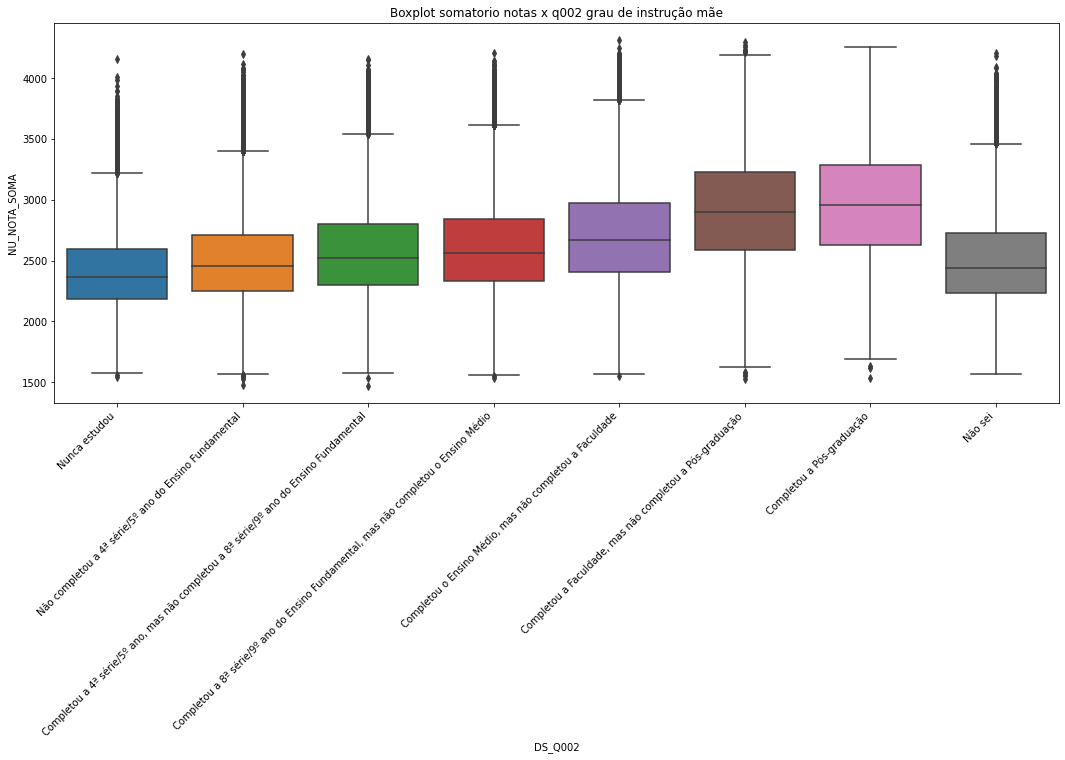

In [122]:
plt.figure(figsize=(18,7))
plt.title("Boxplot somatorio notas x q002 grau de instrução mãe")
chart = sns.boxplot(data=df_nota_presentes_soma_q002, y="NU_NOTA_SOMA", x="DS_Q002", order=sort_unique_q002)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

É visivel que quanto maior escolaridade da mãe maior somatorio de notas do candidato.

### Q006 Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

In [123]:
df_nota_presentes_soma_q006 = df_nota_presentes_soma[["NU_NOTA_SOMA", "Q006"]]
df_nota_presentes_soma_q006

,NU_NOTA_SOMA,Q006
1,2577.50000,B
3,3338.00000,B
4,2850.30000,C
8,2428.00000,B
9,2334.70000,B
...,...,...
2685044,2444.30000,B
2685046,2298.80000,B
2685048,3373.00000,C
2685049,2907.50000,A


In [124]:
# criar função para incluir coluna com descrição

def acerta_q006(q006):
  if q006 == "A":
    return "Nenhuma Renda"
  elif q006 == "B":
    return "Até R$ 1.100,00"
  elif q006 == "C":
    return "De R$ 1.100,01 até R$ 1.650,00"
  elif q006 == "D":
    return "De R$ 1.650,01 até R$ 2.200,00"
  elif q006 == "E":
    return "De R$ 2.200,01 até R$ 2.750,00"
  elif q006 == "F":
    return "De R$ 2.750,01 até R$ 3.300,00"
  elif q006 == "G":
    return "De R$ 3.300,01 até R$ 4.400,00"
  elif q006 == "H":
    return "De R$ 4.400,01 até R$ 5.500,00"
  elif q006 == "I":
    return "De R$ 5.500,01 até R$ 6.600,00"
  elif q006 == "J":
    return "De R$ 6.600,01 até R$ 7.700,00"
  elif q006 == "K":
    return "De R$ 7.700,01 até R$ 8.800,00"
  elif q006 == "L":
    return "De R$ 8.800,01 até R$ 9.900,00"
  elif q006 == "M":
    return "De R$ 9.900,01 até R$ 11.000,00"
  elif q006 == "N":
    return "De R$ 11.000,01 até R$ 13.200,00"
  elif q006 == "O":
    return "De R$ 13.200,01 até R$ 16.500,00"
  elif q006 == "P":
    return "De R$ 16.500,01 até R$ 22.000,00"
  elif q006 == "Q":
    return "Acima de R$ 22.000,00"

In [125]:
df_nota_presentes_soma_q006["DS_Q006"] = df_nota_presentes_soma_q006["Q006"].apply(acerta_q006)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
df_nota_presentes_soma_q006.sample(10)

,NU_NOTA_SOMA,Q006,DS_Q006
58577,2230.60000,B,"Até R$ 1.100,00"
1926797,2932.40000,G,"De R$ 3.300,01 até R$ 4.400,00"
1334914,3269.20000,D,"De R$ 1.650,01 até R$ 2.200,00"
2623837,2362.40000,B,"Até R$ 1.100,00"
953203,3003.90000,B,"Até R$ 1.100,00"
1113354,2395.00000,E,"De R$ 2.200,01 até R$ 2.750,00"
1551334,2724.20000,D,"De R$ 1.650,01 até R$ 2.200,00"
1941275,3139.90000,B,"Até R$ 1.100,00"
1674000,2704.30000,C,"De R$ 1.100,01 até R$ 1.650,00"
1980109,3353.40000,D,"De R$ 1.650,01 até R$ 2.200,00"


In [127]:
# verificar quem não respondeu

df_nota_presentes_soma_q006[df_nota_presentes_soma_q006.isna()["DS_Q006"]]

,NU_NOTA_SOMA,Q006,DS_Q006
707314,2336.40000,NaN,None


In [128]:
df_nota_presentes_soma_q006.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [129]:
df_nota_presentes_soma_q006["DS_Q006"].value_counts().reset_index().rename(columns={"index":"DS_Q006", "DS_Q006": "QT"})

,DS_Q006,QT
0,"Até R$ 1.100,00",459365
1,"De R$ 1.100,01 até R$ 1.650,00",288137
2,"De R$ 1.650,01 até R$ 2.200,00",229494
3,"De R$ 2.750,01 até R$ 3.300,00",141451
4,"De R$ 3.300,01 até R$ 4.400,00",124721
5,"De R$ 2.200,01 até R$ 2.750,00",119654
6,"De R$ 4.400,01 até R$ 5.500,00",101301
7,Nenhuma Renda,93635
8,"De R$ 5.500,01 até R$ 6.600,00",64580
9,"De R$ 9.900,01 até R$ 11.000,00",41533


In [130]:
df_nota_presentes_soma_q006["DS_Q006"].value_counts(normalize=True).reset_index().rename(columns={"index":"DS_Q006", "DS_Q006": "PC"})

,DS_Q006,PC
0,"Até R$ 1.100,00",0.24401
1,"De R$ 1.100,01 até R$ 1.650,00",0.15305
2,"De R$ 1.650,01 até R$ 2.200,00",0.12190
3,"De R$ 2.750,01 até R$ 3.300,00",0.07514
4,"De R$ 3.300,01 até R$ 4.400,00",0.06625
5,"De R$ 2.200,01 até R$ 2.750,00",0.06356
6,"De R$ 4.400,01 até R$ 5.500,00",0.05381
7,Nenhuma Renda,0.04974
8,"De R$ 5.500,01 até R$ 6.600,00",0.03430
9,"De R$ 9.900,01 até R$ 11.000,00",0.02206


In [131]:
sort_unique_q006 = df_nota_presentes_soma_q006.sort_values("Q006")["DS_Q006"].unique()

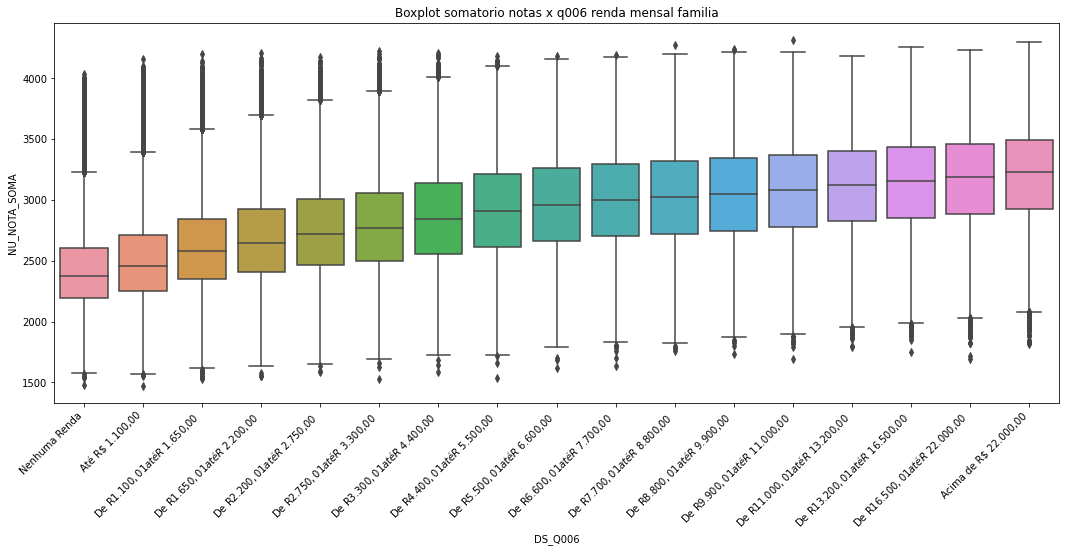

In [132]:
plt.figure(figsize=(18,7))
plt.title("Boxplot somatorio notas x q006 renda mensal familia")
chart = sns.boxplot(data=df_nota_presentes_soma_q006, y="NU_NOTA_SOMA", x="DS_Q006", order=sort_unique_q006)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

É visivel que ao aumentar a renda a nota total do candidato sobe.

Referências:

Rotating axis labels ->
https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

### Q022 Na sua residência tem telefone celular?

In [133]:
df_nota_presentes_soma_q022 = df_nota_presentes_soma[["NU_NOTA_SOMA", "Q022"]]
df_nota_presentes_soma_q022

,NU_NOTA_SOMA,Q022
1,2577.50000,C
3,3338.00000,B
4,2850.30000,E
8,2428.00000,B
9,2334.70000,C
...,...,...
2685044,2444.30000,C
2685046,2298.80000,B
2685048,3373.00000,E
2685049,2907.50000,D


In [134]:
# criar função para incluir coluna com descrição

def acerta_q022(q022):
  if q022 == "A":
    return "Nao"
  elif q022 == "B":
    return "Sim, um"
  elif q022 == "C":
    return "Sim, dois"
  elif q022 == "D":
    return "Sim, três"
  elif q022 == "E":
    return "Sim, quatro ou mais"

In [135]:
df_nota_presentes_soma_q022["DS_Q022"] = df_nota_presentes_soma_q022["Q022"].apply(acerta_q022)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
df_nota_presentes_soma_q022.sample(10)

,NU_NOTA_SOMA,Q022,DS_Q022
642653,3085.50000,C,"Sim, dois"
685308,2998.90000,D,"Sim, três"
18935,2621.80000,D,"Sim, três"
1320502,2915.80000,D,"Sim, três"
522099,2534.10000,C,"Sim, dois"
1771762,2334.60000,C,"Sim, dois"
2676131,2998.50000,C,"Sim, dois"
799854,2025.20000,D,"Sim, três"
1706611,2306.90000,C,"Sim, dois"
2141714,2876.00000,E,"Sim, quatro ou mais"


In [137]:
# verificar quem não respondeu

df_nota_presentes_soma_q022[df_nota_presentes_soma_q022.isna()["DS_Q022"]]

,NU_NOTA_SOMA,Q022,DS_Q022
707314,2336.40000,NaN,None


In [138]:
df_nota_presentes_soma_q022.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [139]:
df_nota_presentes_soma_q022["DS_Q022"].value_counts().reset_index().rename(columns={"index":"DS_Q022", "DS_Q022": "QT"})

,DS_Q022,QT
0,"Sim, três",611003
1,"Sim, quatro ou mais",496778
2,"Sim, dois",486859
3,"Sim, um",257020
4,Nao,30940


In [140]:
df_nota_presentes_soma_q022["DS_Q022"].value_counts(normalize=True).reset_index().rename(columns={"index":"DS_Q022", "DS_Q022": "PC"})

,DS_Q022,PC
0,"Sim, três",0.32455
1,"Sim, quatro ou mais",0.26388
2,"Sim, dois",0.25861
3,"Sim, um",0.13652
4,Nao,0.01643


In [141]:
# none?
sort_unique_q022 = df_nota_presentes_soma_q022.sort_values("Q022")["DS_Q022"].unique()
sort_unique_q022

array(['Nao', 'Sim, um', 'Sim, dois', 'Sim, três', 'Sim, quatro ou mais'],
      dtype=object)

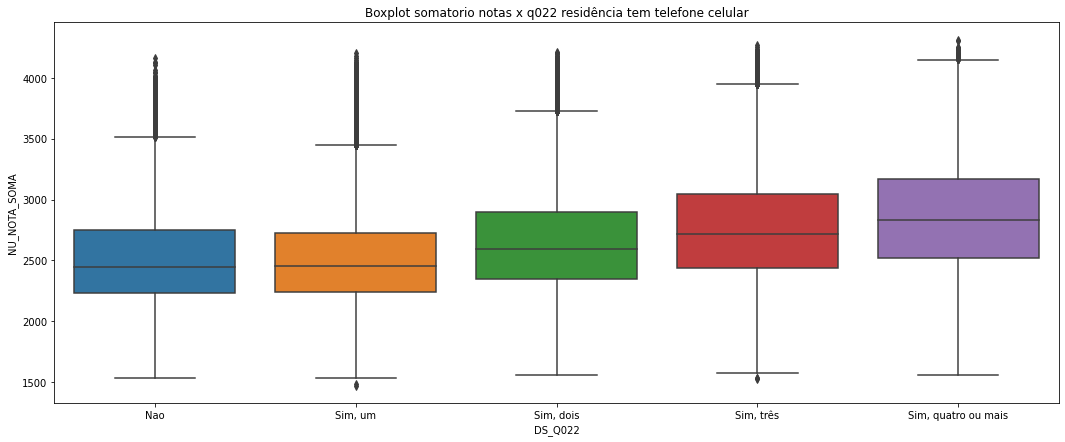

In [142]:
plt.figure(figsize=(18,7))
plt.title("Boxplot somatorio notas x q022 residência tem telefone celular")
sns.boxplot(data=df_nota_presentes_soma_q022, y="NU_NOTA_SOMA", x="DS_Q022", order=sort_unique_q022)
plt.show()

É possível observar que conforme a quantidade de telefones celular na residência, maior é o desempenho do candidato no somatorio de notas

### Q024 Na sua residência tem computador?

In [143]:
df_nota_presentes_soma_q024 = df_nota_presentes_soma[["NU_NOTA_SOMA", "Q024"]]
df_nota_presentes_soma_q024

,NU_NOTA_SOMA,Q024
1,2577.50000,A
3,3338.00000,B
4,2850.30000,B
8,2428.00000,A
9,2334.70000,A
...,...,...
2685044,2444.30000,A
2685046,2298.80000,B
2685048,3373.00000,C
2685049,2907.50000,A


In [144]:
# criar função para incluir coluna com descrição

def acerta_q024(q024):
  if q024 == "A":
    return "Nao"
  elif q024 == "B":
    return "Sim, um"
  elif q024 == "C":
    return "Sim, dois"
  elif q024 == "D":
    return "Sim, três"
  elif q024 == "E":
    return "Sim, quatro ou mais"

In [145]:
df_nota_presentes_soma_q024["DS_Q024"] = df_nota_presentes_soma_q024["Q024"].apply(acerta_q024)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
df_nota_presentes_soma_q024.sample(10)

,NU_NOTA_SOMA,Q024,DS_Q024
1699335,2723.00000,B,"Sim, um"
431015,2121.50000,A,Nao
932547,2599.60000,A,Nao
1326653,2804.60000,A,Nao
1595064,2770.80000,B,"Sim, um"
1997634,2092.80000,B,"Sim, um"
291419,2794.50000,B,"Sim, um"
532196,2446.80000,C,"Sim, dois"
1239625,2891.50000,C,"Sim, dois"
1154260,2394.00000,C,"Sim, dois"


In [147]:
# verificar quem não respondeu

df_nota_presentes_soma_q024[df_nota_presentes_soma_q024.isna()["DS_Q024"]]

,NU_NOTA_SOMA,Q024,DS_Q024
707314,2336.40000,NaN,None


In [148]:
df_nota_presentes_soma_q024["DS_Q024"].value_counts().reset_index().rename(columns={"index":"DS_Q024", "DS_Q024": "QT"})

,DS_Q024,QT
0,"Sim, um",800656
1,Nao,692205
2,"Sim, dois",239923
3,"Sim, três",98516
4,"Sim, quatro ou mais",51300


In [149]:
df_nota_presentes_soma_q024["DS_Q024"].value_counts(normalize=True).reset_index().rename(columns={"index":"DS_Q024", "DS_Q024": "PC"})

,DS_Q024,PC
0,"Sim, um",0.42529
1,Nao,0.36769
2,"Sim, dois",0.12744
3,"Sim, três",0.05233
4,"Sim, quatro ou mais",0.02725


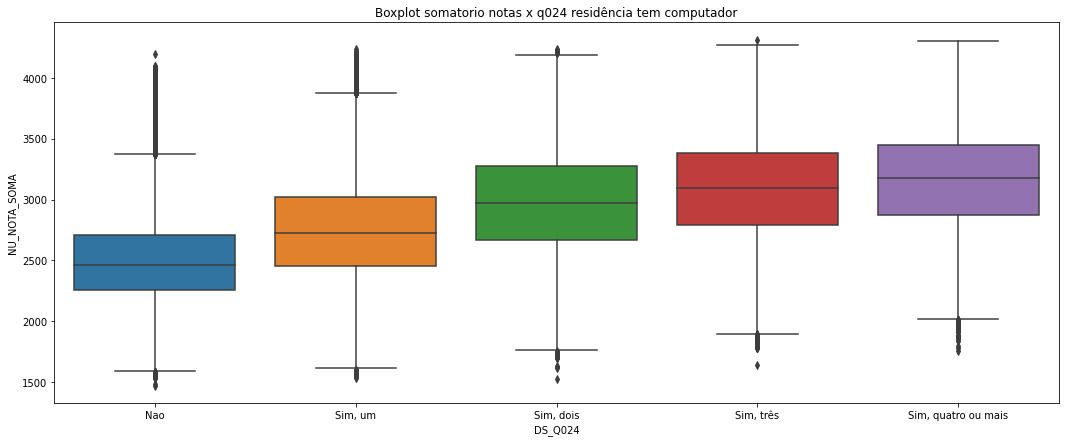

In [150]:
plt.figure(figsize=(18,7))
plt.title("Boxplot somatorio notas x q024 residência tem computador")
sns.boxplot(data=df_nota_presentes_soma_q024, y="NU_NOTA_SOMA", x="DS_Q024", order=["Nao", "Sim, um", "Sim, dois", "Sim, três", "Sim, quatro ou mais"])
plt.show()

Fica evidente que o canditato que possui mais computadores em casa melhor o seu desempenho no somatorio de notas.

### Q025 Na sua residência tem acesso à Internet?

In [151]:
df_nota_presentes_soma_q025 = df_nota_presentes_soma[["NU_NOTA_SOMA", "Q025"]]
df_nota_presentes_soma_q025

,NU_NOTA_SOMA,Q025
1,2577.50000,A
3,3338.00000,B
4,2850.30000,B
8,2428.00000,B
9,2334.70000,B
...,...,...
2685044,2444.30000,B
2685046,2298.80000,B
2685048,3373.00000,B
2685049,2907.50000,B


In [152]:
# criar função para incluir coluna com descrição

def acerta_q025(q025):
  if q025 == "A":
    return "Nao"
  elif q025 == "B":
    return "Sim"

In [153]:
df_nota_presentes_soma_q025["DS_Q025"] = df_nota_presentes_soma_q025["Q025"].apply(acerta_q025)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df_nota_presentes_soma_q025.sample(10)

,NU_NOTA_SOMA,Q025,DS_Q025
347434,3488.10000,B,Sim
252778,2803.70000,B,Sim
1614272,2604.20000,B,Sim
108288,2369.80000,A,Nao
1179349,2640.50000,B,Sim
1672358,2267.10000,A,Nao
1931021,2152.00000,B,Sim
2055040,2514.90000,A,Nao
2466881,3018.60000,B,Sim
2060736,2431.20000,B,Sim


In [155]:
# verificar quem não respondeu

df_nota_presentes_soma_q025[df_nota_presentes_soma_q025.isna()["DS_Q025"]]

,NU_NOTA_SOMA,Q025,DS_Q025
707314,2336.40000,NaN,None


In [156]:
df_nota_presentes_soma_q025["DS_Q025"].value_counts().reset_index().rename(columns={"index":"DS_Q025", "DS_Q025": "QT"})

,DS_Q025,QT
0,Sim,1728371
1,Nao,154229


In [157]:
df_nota_presentes_soma_q025["DS_Q025"].value_counts(normalize=True).reset_index().rename(columns={"index":"DS_Q025", "DS_Q024": "PC"})

,DS_Q025,DS_Q025
0,Sim,0.91808
1,Nao,0.08192


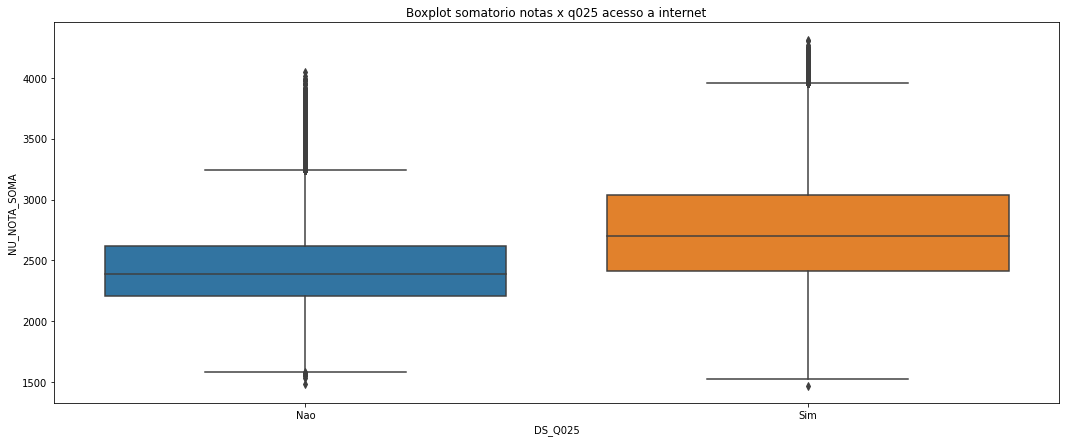

In [158]:
plt.figure(figsize=(18,7))
plt.title("Boxplot somatorio notas x q025 acesso a internet")
sns.boxplot(data=df_nota_presentes_soma_q025, y="NU_NOTA_SOMA", x="DS_Q025")
plt.show()

Podemos notar que o candidato que tem acesso a internet possui o somatorio de notas superior a aqueles que não tem.

## Analise por estado onde foi aplicada a prova x IDHM

In [159]:
# quantidade de candidatos por UF

df_resumo_estado = df_nota_presentes_soma.SG_UF_PROVA.value_counts().reset_index().rename(columns={"index":"SG_UF_PROVA", "SG_UF_PROVA":"QT_UF_PROVA"}).sort_values("QT_UF_PROVA", ascending=False)
df_resumo_estado

,SG_UF_PROVA,QT_UF_PROVA
0,SP,295023
1,MG,185492
2,BA,147545
3,RJ,132044
4,CE,124934
5,PE,111744
6,PA,96919
7,RS,84502
8,PR,80112
9,GO,73428


In [160]:
df_nota_presentes_soma[notas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_SOMA
1,505.90000,551.80000,498.30000,461.50000,560.00000,2577.50000
3,580.70000,678.90000,638.90000,659.50000,780.00000,3338.00000
4,497.70000,532.40000,457.60000,582.60000,780.00000,2850.30000
8,487.40000,476.50000,450.70000,493.40000,520.00000,2428.00000
9,507.60000,539.20000,494.60000,413.30000,380.00000,2334.70000
...,...,...,...,...,...,...
2685044,437.60000,516.70000,542.60000,407.40000,540.00000,2444.30000
2685046,484.60000,434.80000,424.60000,394.80000,560.00000,2298.80000
2685048,626.30000,672.20000,663.20000,731.30000,680.00000,3373.00000
2685049,535.20000,461.60000,510.80000,599.90000,800.00000,2907.50000


In [161]:
# medidas do somatorio de provas

df_nota_presentes_soma_uf = df_nota_presentes_soma.groupby("SG_UF_PROVA")["NU_NOTA_SOMA"].agg(["min", "mean", "median","max"]).rename(columns={"min":"MIN_NOTA_SOMA", "mean":"MEAN_NOTA_SOMA", "median":"MEDIAN_NOTA_SOMA", "max":"MAX_NOTA_SOMA"}).reset_index().sort_values("MEDIAN_NOTA_SOMA", ascending=False)
df_nota_presentes_soma_uf.head()

,SG_UF_PROVA,MIN_NOTA_SOMA,MEAN_NOTA_SOMA,MEDIAN_NOTA_SOMA,MAX_NOTA_SOMA
25,SP,1588.70000,2837.06043,2808.00000,4299.80000
10,MG,1533.10000,2831.54171,2798.50000,4255.20000
6,DF,1573.80000,2802.85475,2758.10000,4204.20000
23,SC,1706.00000,2793.03206,2757.20000,4163.90000
18,RJ,1550.00000,2793.21079,2756.50000,4313.40000


SP tem a maior mediana (2808.00) da somatoria de notas.

In [162]:
# Dados de IDH de 2017

df_uf_idh = pd.read_csv("/content/drive/MyDrive/dataset/idh2017_tratado.csv", sep=",")
df_uf_idh.head()

,UF,REGIAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
0,BRASIL,BRASIL,0.74000,0.85000,0.75000,0.77800
1,AC,NORTE,0.68000,0.82000,0.66000,0.71900
2,AL,NORDESTE,0.64000,0.78000,0.64000,0.68300
3,AP,NORTE,0.71000,0.82000,0.70000,0.74000
4,AM,NORTE,0.74000,0.79000,0.68000,0.73300


In [163]:
# ordenar por IDHM_EDUCACAO_2017

df_uf_idh.sort_values("IDHM_EDUCACAO_2017", ascending=False).head()

,UF,REGIAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
25,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
7,DF,CENTRO-OESTE,0.80000,0.89000,0.86000,0.85000
24,SC,SUL,0.78000,0.87000,0.78000,0.80800
23,RR,NORTE,0.77000,0.78000,0.71000,0.75200
12,MT,CENTRO-OESTE,0.76000,0.83000,0.74000,0.77400


SP tem o maior IDHM na educação (0.83).

In [164]:
# ordenar por IDHM_RENDA_2017

df_uf_idh.sort_values("IDHM_RENDA_2017", ascending=False).head()

,UF,REGIAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
7,DF,CENTRO-OESTE,0.80000,0.89000,0.86000,0.85000
25,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
21,RS,SUL,0.73000,0.85000,0.79000,0.78700
24,SC,SUL,0.78000,0.87000,0.78000,0.80800
15,PR,SUL,0.76000,0.84000,0.77000,0.79200


DF tem o maior IDHM na renda (0.86).

In [165]:
# ordenar por IDHM_2017

df_uf_idh.sort_values("IDHM_2017", ascending=False).head()

,UF,REGIAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
7,DF,CENTRO-OESTE,0.80000,0.89000,0.86000,0.85000
25,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
24,SC,SUL,0.78000,0.87000,0.78000,0.80800
19,RJ,SUDESTE,0.76000,0.86000,0.77000,0.79600
15,PR,SUL,0.76000,0.84000,0.77000,0.79200


DF tem o maior IDHM geral (0.85).

In [166]:
# Cruzar os dados do IDHM de 2017 com o somatorio de notas

df_merge_nota_uf = df_nota_presentes_soma_uf.merge(df_uf_idh, left_on="SG_UF_PROVA", right_on="UF").sort_values("IDHM_EDUCACAO_2017", ascending=False)
df_merge_nota_uf

,SG_UF_PROVA,MIN_NOTA_SOMA,MEAN_NOTA_SOMA,MEDIAN_NOTA_SOMA,MAX_NOTA_SOMA,UF,REGIAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
0,SP,1588.70000,2837.06043,2808.00000,4299.80000,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
2,DF,1573.80000,2802.85475,2758.10000,4204.20000,DF,CENTRO-OESTE,0.80000,0.89000,0.86000,0.85000
3,SC,1706.00000,2793.03206,2757.20000,4163.90000,SC,SUL,0.78000,0.87000,0.78000,0.80800
16,RR,1660.40000,2634.30610,2585.30000,3891.80000,RR,NORTE,0.77000,0.78000,0.71000,0.75200
4,RJ,1550.00000,2793.21079,2756.50000,4313.40000,RJ,SUDESTE,0.76000,0.86000,0.77000,0.79600
7,PR,1530.20000,2756.11744,2711.70000,4190.30000,PR,SUL,0.76000,0.84000,0.77000,0.79200
12,MT,1555.00000,2658.69050,2600.80000,4135.70000,MT,CENTRO-OESTE,0.76000,0.83000,0.74000,0.77400
1,MG,1533.10000,2831.54171,2798.50000,4255.20000,MG,SUDESTE,0.75000,0.88000,0.74000,0.78700
9,GO,1578.60000,2689.99972,2629.05000,4212.20000,GO,CENTRO-OESTE,0.74000,0.82000,0.75000,0.76900
26,AM,1549.00000,2503.67752,2436.45000,4118.80000,AM,NORTE,0.74000,0.79000,0.68000,0.73300


In [167]:
df_merge_nota_uf[["MAX_NOTA_SOMA","IDHM_EDUCACAO_2017","IDHM_LONGEVIDADE_2017","IDHM_RENDA_2017","IDHM_2017"]].corr()

,MAX_NOTA_SOMA,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
MAX_NOTA_SOMA,1.00000,0.24674,0.46576,0.42372,0.40271
IDHM_EDUCACAO_2017,0.24674,1.00000,0.59760,0.81252,0.90515
IDHM_LONGEVIDADE_2017,0.46576,0.59760,1.00000,0.80938,0.84413
IDHM_RENDA_2017,0.42372,0.81252,0.80938,1.00000,0.96852
IDHM_2017,0.40271,0.90515,0.84413,0.96852,1.00000


A maior correlação com o somatorio de notas é o IDHM_LONGEVIDADE_2017 (0.46).

In [168]:
# Cruzar os dados do IDHM de 2017 com as notas individuais

df_notas_individuais_uf = df_nota_presentes[["SG_UF_PROVA","NU_NOTA_CN",	"NU_NOTA_CH",	"NU_NOTA_LC", "NU_NOTA_MT",	"NU_NOTA_REDACAO"]]

df_merge_nota_individual_uf = df_notas_individuais_uf.merge(df_uf_idh, left_on="SG_UF_PROVA", right_on="UF").sort_values("IDHM_EDUCACAO_2017", ascending=False)
df_merge_nota_individual_uf

,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,UF,REGIAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
1216773,SP,447.10000,615.40000,561.40000,591.20000,480.00000,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
1172332,SP,590.70000,610.00000,604.90000,662.60000,740.00000,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
1172324,SP,573.50000,657.10000,467.60000,661.80000,580.00000,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
1172325,SP,406.10000,492.60000,454.60000,372.20000,560.00000,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
1172326,SP,578.50000,540.20000,502.20000,651.00000,680.00000,SP,SUDESTE,0.83000,0.85000,0.80000,0.82600
...,...,...,...,...,...,...,...,...,...,...,...,...
944115,SE,642.30000,658.60000,546.40000,714.60000,680.00000,SE,NORDESTE,0.64000,0.80000,0.68000,0.70200
944114,SE,610.30000,632.20000,596.70000,594.60000,820.00000,SE,NORDESTE,0.64000,0.80000,0.68000,0.70200
944113,SE,522.70000,624.60000,567.60000,642.40000,740.00000,SE,NORDESTE,0.64000,0.80000,0.68000,0.70200
944112,SE,457.90000,479.60000,513.40000,513.20000,620.00000,SE,NORDESTE,0.64000,0.80000,0.68000,0.70200


In [169]:
df_merge_nota_individual_uf.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IDHM_EDUCACAO_2017,IDHM_LONGEVIDADE_2017,IDHM_RENDA_2017,IDHM_2017
NU_NOTA_CN,1.00000,0.69094,0.67274,0.68227,0.51582,0.16871,0.18079,0.18494,0.19069
NU_NOTA_CH,0.69094,1.00000,0.75800,0.64049,0.52370,0.17810,0.19018,0.19602,0.20150
NU_NOTA_LC,0.67274,0.75800,1.00000,0.63985,0.54267,0.21437,0.21829,0.23020,0.23753
NU_NOTA_MT,0.68227,0.64049,0.63985,1.00000,0.53479,0.18867,0.19825,0.19836,0.20838
NU_NOTA_REDACAO,0.51582,0.52370,0.54267,0.53479,1.00000,0.04735,0.08375,0.05959,0.06384
IDHM_EDUCACAO_2017,0.16871,0.17810,0.21437,0.18867,0.04735,1.00000,0.66941,0.86266,0.94157
IDHM_LONGEVIDADE_2017,0.18079,0.19018,0.21829,0.19825,0.08375,0.66941,1.00000,0.79621,0.84047
IDHM_RENDA_2017,0.18494,0.19602,0.23020,0.19836,0.05959,0.86266,0.79621,1.00000,0.96980
IDHM_2017,0.19069,0.20150,0.23753,0.20838,0.06384,0.94157,0.84047,0.96980,1.00000


A maior correlação com IDHM geral é com a nota de Linguagens e Códigos (0.23753).

Referências: 

Agg -> https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9

IDH

-> https://www.undp.org/pt/brazil/idhm-uf-2010

-> http://www.atlasbrasil.org.br

## Machine Learning

Regressão Linear

Aplicar o modelo para prever as notas de redação em função das notas de Ciências Naturais, Ciências Humanas, Linguagem e Código e Matemática.

Sendo:

x = NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT 	
y = NU_NOTA_REDACAO

In [170]:
# import das bibliotecas

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [171]:
# definição das variaveis que compõe x e y

X = df_nota_presentes[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT"]]
y = df_nota_presentes["NU_NOTA_REDACAO"]

In [172]:
# divisão da base em dados de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [173]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1261342, 4)
(1261342,)
(621259, 4)
(621259,)


In [174]:
# criação do modelo com os dados de treino

model_lr = LinearRegression().fit(X_train, y_train)

In [175]:
y_predict = model_lr.predict(X_test)

In [176]:
f = {"test":y_test, "predict":y_predict}
df_result = pd.DataFrame(f)
df_result

,test,predict
2409824,480.00000,671.53643
1562373,680.00000,593.98152
492064,640.00000,664.52686
1972107,760.00000,609.54648
677271,580.00000,601.13712
...,...,...
1117730,660.00000,754.50190
2037102,500.00000,619.25889
1454960,360.00000,551.30595
2300918,740.00000,500.14876


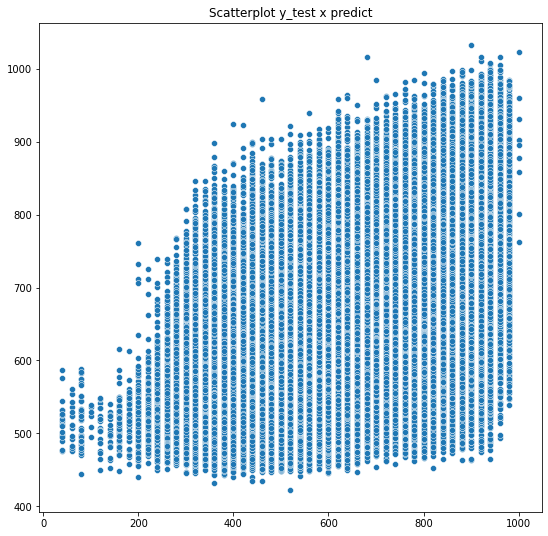

In [177]:
plt.figure(figsize=(9,9))
plt.title("Scatterplot y_test x predict")
sns.scatterplot(x = y_test.values, y=y_predict)
plt.show()

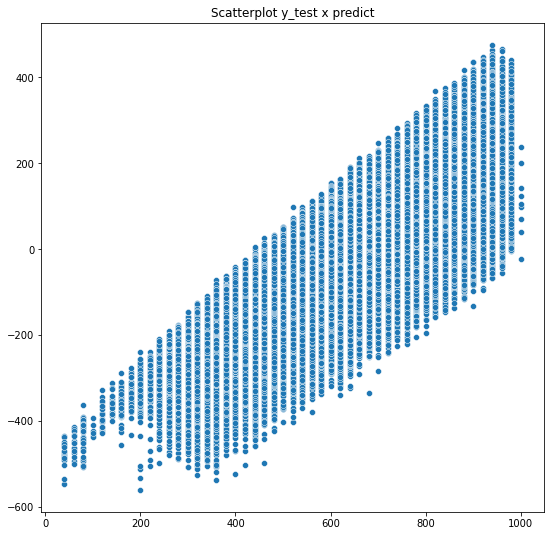

In [178]:
plt.figure(figsize=(9,9))
plt.title("Scatterplot y_test x predict")
sns.scatterplot(x = y_test.values, y = y_test.values - y_predict)
plt.show()

In [179]:
# metricas de avaliação do modelo

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predict)

14958.749629210504

In [180]:
mean_squared_error(y_test, y_test)

0.0

In [189]:
model_lr.score(X_test, y_test)

0.37025330597211137

In [182]:
# comparar o modelo LinearRegression criado com um modelo mais simples

from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor().fit(X_train, y_train)

dummy_predict = model_dummy.predict(X_test)

mean_squared_error(y_test, dummy_predict)

23753.647524262604

In [183]:
# apesar do erro quadrático médio estar menor do modelo LinearRegression (14958.74) comparado com o modelo simple (23753.64), irei testar outro modelo

In [184]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor().fit(X_train, y_train)

dtr_predict = model_dtr.predict(X_test)

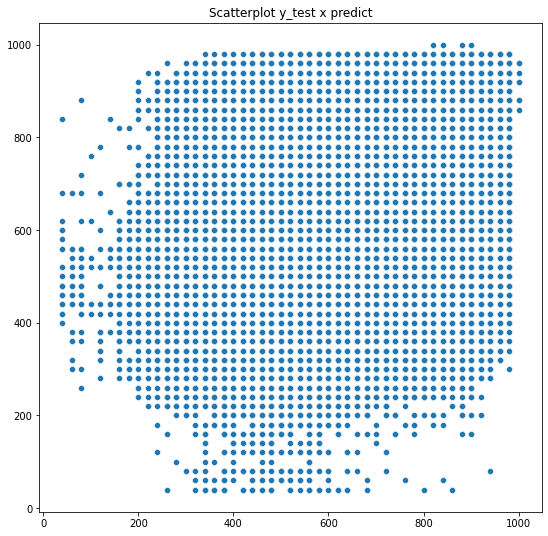

In [185]:
plt.figure(figsize=(9,9))
plt.title("Scatterplot y_test x predict")
sns.scatterplot(x=y_test.values, y=dtr_predict)
plt.show()

In [186]:
mean_squared_error(y_test, dtr_predict)

30984.460265364363

In [187]:
# ficarei com o modelo inicial LinearRegression que apresentou menor erro quadratico médio

In [188]:
# salvar o modelo

import pickle

filename = '/content/drive/MyDrive/dataset/model_lr_final.sav'
pickle.dump(model_lr, open(filename, 'wb'))

In [190]:
# abrir o modelo

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.37025330597211137


## Conclusão

Após realizar a análise exploratório dos dados foi possível averiguar:

1) SP teve o melhor desempenho no somatorio de notas e do IDHM de educação.

2) A maior correlação foi observada entre as notas Linguagens e Códigos e Ciências Humanas. 

As demais notas tem correlação entre 0.51 e 0.54 com a nota de redação.

3) Quanto maior escolaridade do pai maior somatorio de notas do candidato.

4) Quanto maior escolaridade da mãe maior somatorio de notas do candidato.

5) Ao aumentar a renda a nota total do candidato sobe.

6) Conforme a quantidade de telefones celular na residência, maior é o desempenho do candidato no somatorio de notas.

7) O canditato que possui mais computadores em casa melhor o seu desempenho no somatorio de notas.

8) O candidato que tem acesso a internet possui o somatorio de notas superior a aqueles que não tem.

